In [1]:
# Starting the Project by importing the librarires
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# I.Capstone II Porject
Prepared by Jeffrey Aroun bin Omar
<br>
DataScience Job connecter JCDSOL-009

### II.Start - 21st.March.2022
- Data: [TSA_claims_Datasets](https://www.kaggle.com/datasets/terminal-security-agency/tsa-claims-database)
- Title: TSA Claims Database

### II.I Background 
This dataset looks into claims filed against the Transportation Security Administration (TSA), which is responsible for providing security for the traveling public in the United States. The TSA was created in response to the September 11, 2001 terrorist attacks, with the goal of preventing similar attacks from occurring in the future. The agency is mainly responsible for screening passengers and their baggage, as well as overseeing security measures in airports and on airplanes.

This data includes information on the claimant, the type and amount of the claim, and the location and date of the incident. By analyzing this data, I hope to provide insights that can be used to improve security procedures and reduce the number of claims filed.


We will be exploring and analyzing the dataset using the techniques taught by Purwadhika. Also to provide possible recommendations for better service and performance.

### III.Problem Statement
We will explore:- 
1. What are the most common types of claims filed with the TSA, and how has this changed over time?
2. Where these do claims happen most often across all airports and how they compare year on year.
3. How has the number and type of claims filed with the TSA changed over time, and what factors may have contributed to these changes?
4. What are the most common types of items claims are filled against the TSA.
5. What are the top 10 Airports that account for these claims. 
6. Amongst the top 10 Airports To Approve and Disapprove claims.



## 1. Getting to know the Data 
1. Importing the data using pandas. 
2. Get the shape of the dataset and identify the number of unique values in it as well as missing values. 
3. See how we can prepare the data for better analysis.

In [2]:
# Importing the data set 
df = pd.read_csv('tsa_claims.csv')

# get the head to see what it looks like 
df.head()

C:\Users\User\AppData\Local\Temp\ipykernel_5580\1141186449.py:2: DtypeWarning: Columns (0,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('tsa_claims.csv')


,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909802M,4-Jan-02,12/12/2002 0:00,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,$350.00,Approved,$350.00,Approve in Full
1,0202417M,2-Feb-02,1/16/2004 0:00,SEA,Seattle-Tacoma International,NaN,Property Damage,Checked Baggage,Luggage (all types including footlockers),$100.00,Settled,$50.00,Settle
2,0202445M,4-Feb-02,11/26/2003 0:00,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,$278.88,Settled,$227.92,Settle
3,0909816M,7-Feb-02,1/6/2003 0:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full
4,2.00503E+12,18-Feb-02,2/5/2005 0:00,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,$84.79,Approved,$84.79,Approve in Full


In [3]:
# Trying out getting a random sample
df.sample(n=5)

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
42487,2.00409E+12,11-Aug-04,6/25/2004 0:00,MIA,Miami International Airport,NaN,Passenger Property Loss,Checked Baggage,Locks,$700.00,Denied,$0.00,Deny
182750,2.01308E+12,26-Jul-13,2/26/2013 13:30,ABQ,Albuquerque International Sunport Airport,UAL,Passenger Property Loss,Checked Baggage,-,$0.00,Deny,NaN,NaN
80329,2.00602E+12,7-Feb-06,12/31/2005 0:00,PHL,Philadelphia International Airport,USAir,Property Damage,Checked Baggage,Locks,$40.00,Denied,$0.00,Deny
76028,2.00512E+12,23-Nov-05,10/9/2005 0:00,MIA,Miami International Airport,American Airlines,Passenger Property Loss,Checked Baggage,Jewelry - Fine,$2;001.00,Denied,$0.00,Deny
21534,1205628M,5-Dec-03,10/31/2003 0:00,PVD,TF Green Airport; Providence,NaN,Property Damage,Checked Baggage,Other,$430.00,Approved,$430.00,Approve in Full


Before we continue working with the data set lets standardize dates incident date and date Received.

In [4]:
# Convert Incident Date column to datetime format and format it as dd-Mon-yy
df['Incident Date'] = pd.to_datetime(df['Incident Date'], errors='coerce')
df['Incident Date'] = df['Incident Date'].dt.strftime('%d-%b-%y')

# Identify any out-of-bounds values in the Incident Date column
#  datetime values that are either too early or too late to be represented in a 64-bit Unix timestamp. 
out_of_bounds = df.loc[pd.to_datetime(df['Incident Date'], errors='coerce').isna()]
if len(out_of_bounds) > 0:
    # Print the row(s) that contain out-of-bounds values
    out_of_bounds_row = out_of_bounds.index[0]
    print(f"Out-of-bounds value at index {out_of_bounds_row}:")
    print(df.iloc[out_of_bounds_row])
    # Remove the row(s) that contain out-of-bounds values
    df = df.drop(out_of_bounds.index)

# Confirm that there are no missing values in the Incident Date column
print(df['Incident Date'].isna().sum())


Out-of-bounds value at index 14:
Claim Number                                       0616771L
Date Received                                     12-Jul-02
Incident Date                                           NaN
Airport Code                                            NaN
Airport Name                                            NaN
Airline Name                                            NaN
Claim Type                                              NaN
Claim Site                                            Other
Item             Clothing - Shoes; belts; accessories; etc.
Claim Amount                                            NaN
Status                                               Denied
Close Amount                                            NaN
Disposition                                            Deny
Name: 14, dtype: object
0


In [5]:
# Checking to see if Incident date was updated.
df.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909802M,4-Jan-02,12-Dec-02,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,$350.00,Approved,$350.00,Approve in Full
1,0202417M,2-Feb-02,16-Jan-04,SEA,Seattle-Tacoma International,NaN,Property Damage,Checked Baggage,Luggage (all types including footlockers),$100.00,Settled,$50.00,Settle
2,0202445M,4-Feb-02,26-Nov-03,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,$278.88,Settled,$227.92,Settle
3,0909816M,7-Feb-02,06-Jan-03,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full
4,2.00503E+12,18-Feb-02,05-Feb-05,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,$84.79,Approved,$84.79,Approve in Full


## 1.1 What are we working with


In [6]:
df.describe()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
count,201920,201781,201920,194865,194865,169406,195503,201374,198155,199353,201920,134167,130444
unique,28095,4001,5005,465,485,318,11,6,4694,36037,15,17092,3
top,2.00503E+12,17-Dec-03,27-Dec-04,LAX,John F. Kennedy International,American Airlines,Passenger Property Loss,Checked Baggage,Other,$0.00,Denied,$0.00,Deny
freq,4044,676,144,9551,9200,17466,117399,158962,36357,28439,67923,70888,67965


In [7]:
# Identify how many columns and max number of rows we got.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201920 entries, 0 to 204269
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Claim Number   201920 non-null  object
 1   Date Received  201781 non-null  object
 2   Incident Date  201920 non-null  object
 3   Airport Code   194865 non-null  object
 4   Airport Name   194865 non-null  object
 5   Airline Name   169406 non-null  object
 6   Claim Type     195503 non-null  object
 7   Claim Site     201374 non-null  object
 8   Item           198155 non-null  object
 9   Claim Amount   199353 non-null  object
 10  Status         201920 non-null  object
 11  Close Amount   134167 non-null  object
 12  Disposition    130444 non-null  object
dtypes: object(13)
memory usage: 21.6+ MB


In [8]:
# Number of missing values and their percentage compared to the whole dataset.
missing_values = df.isnull()
missing_columns = missing_values.sum()
unique_values = df.describe().loc['unique']
missing_df = pd.DataFrame({'Missing Values Count': missing_columns,
                           "Unique Number of Values": unique_values,
                           '%': (missing_columns / len(df)) * 100})
missing_df['%'] = missing_df['%'].round(2)

missing_df = missing_df.sort_values(by='%', ascending=False)

missing_df

,Missing Values Count,Unique Number of Values,%
Disposition,71476,3,35.40
Close Amount,67753,17092,33.55
Airline Name,32514,318,16.10
Airport Code,7055,465,3.49
Airport Name,7055,485,3.49
Claim Type,6417,11,3.18
Item,3765,4694,1.86
Claim Amount,2567,36037,1.27
Claim Site,546,6,0.27
Date Received,139,4001,0.07


### 1.1.1 What we have

1. __Rows and Columns__
<br>
The dataset (df) has 204270 rows and 14 columns.

2. __Missing Values__
<br>
The dataset contains many missing values. However, for our analysis, we will only drop rows that have null values for airport information. This is because we want to focus on claims that occurred at airports and ensure that we can trace any potential discrimination in claims based on airports. Additionally, we will explore ways to fill in missing data in the Disposition column with values from the Status column, as we found that there was a change in terminology between these columns.

- Airline Name will be filled with values such as Unknown/Unspecified. Because to drop it would mean to exclude family or friends sending off people who are traveling.

3. __Item and Financial Data Columns__
<br>
We plan to fill in missing values in the Item column based on the Claim Type column. We will also investigate financial data columns such as Claim Amount and Close Amount to identify trends and patterns in claim amounts.


In [96]:
df.columns

Index(['Claim Number', 'Date Received', 'Incident Date', 'Airport Code',
       'Airport Name', 'Airline Name', 'Claim Type', 'Claim Site', 'Item',
       'Claim Amount', 'Status', 'Close Amount', 'Disposition', 'Month',
       'Year'],
      dtype='object')

In [9]:
df.isna().sum()

Claim Number         0
Date Received      139
Incident Date        0
Airport Code      7055
Airport Name      7055
Airline Name     32514
Claim Type        6417
Claim Site         546
Item              3765
Claim Amount      2567
Status               0
Close Amount     67753
Disposition      71476
dtype: int64

### 1.1.2 Airport Name and Airport Code 
Due to the nature of the TSA operating at airports we will first ensure our dataset always has Airport information. Thus we will just drop all null values in this column. 
<br>
<br>
Since airport name and code have the same amount of missing values. I only need to drop all null values for airport code. As Airport names seem to have a semicolon attacthed to them signaling routes.
<br>
<br>

##### Note: There two types of Null Values NaN and ' - '
We will first identify all - values

In [10]:
# checking for count of - values.
filtered_rows = df[df['Airport Code'] == '-']
print("Count of rows with '-' in 'Airport Code':", len(filtered_rows))

Count of rows with '-' in 'Airport Code': 441


In [11]:
# Drop null values and all values which are -
df.drop(df[df['Airport Code'].isnull() | (df['Airport Code'] == '-')].index, inplace=True)

In [12]:
df.isna().sum()

Claim Number         0
Date Received      109
Incident Date        0
Airport Code         0
Airport Name         0
Airline Name     27615
Claim Type        5445
Claim Site         350
Item              3544
Claim Amount      2042
Status               0
Close Amount     64282
Disposition      67784
dtype: int64

### 1.1.3 Airline Name 
There is a significant amount Airline Name Missing. We will fill the Null values of this to Unknown. It would not be advicable to drop because it is not neccessary everyone who goes to the airport are travelling passengers. 

In [13]:
df['Airline Name'].fillna(value='Unknown/Unspecified', inplace=True)
df['Airline Name'].replace('-', 'Unknown/Unspecified', inplace=True)

In [14]:
df.isna().sum()

Claim Number         0
Date Received      109
Incident Date        0
Airport Code         0
Airport Name         0
Airline Name         0
Claim Type        5445
Claim Site         350
Item              3544
Claim Amount      2042
Status               0
Close Amount     64282
Disposition      67784
dtype: int64

### 1.1.4 Claim Types
We will check what kind of Data the columns as these column seems to hold 11 diffrent values from the previous table.

In [15]:
df["Claim Type"].unique()

array(['Property Damage', 'Passenger Property Loss', nan,
       'Personal Injury', 'Motor Vehicle', 'Passenger Theft',
       'Employee Loss (MPCECA)', '-', 'Wrongful Death', 'Bus Terminal',
       'Complaint', 'Compliment'], dtype=object)

In [16]:
missing_values_Claim_Type = df["Claim Type"].isna().sum()
print(f"Number of missing values in Claim Type: {missing_values_Claim_Type}")

Number of missing values in Claim Type: 5445


The Null Values for this type we will classify these as Unspecified. The reason being is if we try to cross reference between the Item columns values there is no way to distinguishing between Property Damange or Passenger Propert Loss. 


In [17]:
df['Claim Type'].fillna(value='Unspecified', inplace=True)
df['Claim Type'].replace('-', 'Unspecified', inplace=True)

In [18]:
df["Claim Type"].unique()

array(['Property Damage', 'Passenger Property Loss', 'Unspecified',
       'Personal Injury', 'Motor Vehicle', 'Passenger Theft',
       'Employee Loss (MPCECA)', 'Wrongful Death', 'Bus Terminal',
       'Complaint', 'Compliment'], dtype=object)

In [19]:
df.isna().sum()

Claim Number         0
Date Received      109
Incident Date        0
Airport Code         0
Airport Name         0
Airline Name         0
Claim Type           0
Claim Site         350
Item              3544
Claim Amount      2042
Status               0
Close Amount     64282
Disposition      67784
dtype: int64

### 1.1.4 Claim Site
Just like the previous execution we will repeat the steps


In [20]:
df["Claim Site"].unique()

array(['Checkpoint', 'Checked Baggage', 'Other', 'Motor Vehicle', nan,
       '-', 'Bus Station'], dtype=object)

In [21]:
df["Claim Site"].isna().sum()

350

Since Claim Site has a very low amount missing values compared to the others. We will Drop these Null values as well since there is already a category called Other. 

In [22]:
df.drop(df[df['Claim Site'].isnull() | (df['Claim Site'] == '-')].index, inplace=True)

In [23]:
df["Claim Site"].isna().sum()

0

### 1.1.5 Disposition
We will rerun again as before the previous 2 execution that was done on the columns.


In [24]:
df["Disposition"].unique()

array(['Approve in Full', 'Settle', nan, 'Deny'], dtype=object)

In [25]:
df["Disposition"].isna().sum()

67508

Upon reviewing the Column. Disposition values depends on values held in the Status columns so we will fill in values as follows: -
<br>
1. Denied = Deny
2. Approved = Approved in Full
3. Settled = Settle
4. Other = Non-Pursuable
5. Canceled = Non-Pursuable
6. Insufficient Evidence = Non-Pursuable
7. In litigation = In pursuit
8. In review = In pursuit
9. Claim has been assigned for further investigation = In pursuit
10. Pending response from claimant = In pursuit
11. Closed as a contractor claim = Non-TSA

This allows to hold only 5 categories that we could use for their performance. 

In [26]:
# This just changes the values in status to what they were before. 
df["Status"].replace("Approve in Full", "Approved", inplace=True)
df["Status"].replace("Deny", "Denied", inplace=True)
df["Status"].replace("Settle", "Settled", inplace=True)
df["Status"].replace("Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.", "Insufficient Evidence", inplace=True)
df['Status'].fillna(value='Other', inplace=True)
df['Status'].replace('-', 'Other', inplace=True)


In [27]:
status_to_disposition = {
    'Denied': 'Deny',
    'Approved': 'Approved in Full',
    'Settled': 'Settle',
    'Other': 'Non-Pursuable',
    'Canceled': 'Non-Pursuable',
    'Insufficient Evidence': 'Non-Pursuable',
    'In litigation': 'In pursuit',
    'In review': 'In pursuit',
    'Claim has been assigned for further investigation': 'In pursuit',
    'Pending response from claimant': 'In pursuit',
    'Closed as a contractor claim': 'Non-TSA',
    
}
df['Disposition'] = df['Status'].map(status_to_disposition)

In [28]:
df["Disposition"].isna().sum()

0

In [29]:
df["Disposition"].unique()

array(['Approved in Full', 'Settle', 'Non-Pursuable', 'Deny',
       'In pursuit', 'Non-TSA'], dtype=object)

In [30]:
df.isna().sum()

Claim Number         0
Date Received      109
Incident Date        0
Airport Code         0
Airport Name         0
Airline Name         0
Claim Type           0
Claim Site           0
Item              3445
Claim Amount      1988
Status               0
Close Amount     64033
Disposition          0
dtype: int64

### 1.1.6 Date Received

We will drop Null dates as well. This will allow us to do a year on year comparison and a month on month comparison as well. 

In [31]:
df.dropna(subset=['Date Received'], inplace=True)

In [32]:
df.isna().sum()

Claim Number         0
Date Received        0
Incident Date        0
Airport Code         0
Airport Name         0
Airline Name         0
Claim Type           0
Claim Site           0
Item              3444
Claim Amount      1985
Status               0
Close Amount     64026
Disposition          0
dtype: int64

In [33]:
# Just grabs 3 random rows so we can see how the data looks
df.sample(n=3)

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
81572,2.00603E+12,3-Mar-06,24-Feb-06,LAX,Los Angeles International Airport,Southwest Airlines,Property Damage,Checked Baggage,Musical Instruments - Other - Over $250,$846.01,Approved,$846.01,Approved in Full
145126,2.01001E+12,30-Dec-09,11-Sep-09,PHX,Phoenix Sky Harbor International,Southwest Airlines,Property Damage,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,$1;000.00,Denied,$0.00,Deny
115578,2.00805E+12,26-Dec-07,03-Nov-07,I,Insurance Subrogation Claim,Unknown/Unspecified,Passenger Property Loss,Other,Other,$2;661.44,Canceled,NaN,Non-Pursuable


Alright I would like to add two more columns called Month and Year this will allow us to get information based on the months and year the fall on. As well Will be easier to group by the data. 

In [34]:
df['Month'] = df['Date Received'].apply(lambda x: pd.to_datetime(x, format='%d-%b-%y').month)
df['Year'] = df['Date Received'].apply(lambda x: pd.to_datetime(x, format='%d-%b-%y').year)

In [35]:
df.sample(n=3)

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Month,Year
160162,2.01105E+12,12-May-11,06-Apr-11,IAD,Washington Dulles International,Copa Airlines,Passenger Property Loss,Checked Baggage,Computer & Accessories,$0.00,Denied,NaN,Deny,5,2011
186475,2.01312E+12,18-Dec-13,19-Nov-13,SEA,Seattle-Tacoma International,American Airlines,Property Damage,Checked Baggage,Medical/Science,-,Other,NaN,Non-Pursuable,12,2013
60121,2.00503E+12,25-Mar-05,28-Jan-05,LAX,Los Angeles International Airport,UAL,Passenger Property Loss,Checked Baggage,Computer - Laptop,$2;089.00,Denied,$0.00,Deny,3,2005


In [36]:
check_month = np.sort(df["Month"].unique())
check_year = np.sort(df["Year"].unique())
display(check_month, check_year)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

array([1994, 1996, 2000, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015, 2020, 2025, 2040, 2044, 2055],
      dtype=int64)

We got some odd dates here in our dataset. I would like to only years between 2002 to 2015. But we'll varify these dates to see if they are for real.

In [37]:
df.loc[df['Year'] == 2044]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Month,Year
96943,2.00412E+12,18-Oct-44,03-Oct-04,DTW,Detroit Metropolitan Wayne County Airport,Northwest Airlines,Passenger Property Loss,Checked Baggage,Jewelry - Fine,$800.00,Denied,NaN,Deny,10,2044


In [38]:
df.loc[df['Year'] == 2055]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Month,Year
96944,2.00505E+12,17-May-55,30-Apr-05,MSP,Minneapolis/ St.Paul International Airport,Northwest Airlines,Property Damage,Checked Baggage,Other,$96.58,Denied,$0.00,Deny,5,2055


They seem to be typos. We'll check the counts to see if they should just be droped altogther.

In [39]:
df['Year'].value_counts()

2004    27615
2005    23680
2006    18568
2007    18311
2003    17391
2008    16254
2009    12599
2010    10828
2011    10811
2012     9953
2013     9574
2014     8759
2015     8579
2002      854
2025        5
2000        4
1996        1
1994        1
2055        1
2044        1
2040        1
2020        1
Name: Year, dtype: int64

We would like to just keep 2002 - 2015 if possible. so we will drop these values as well. As there is no way to cross reference via the Incident date of those dates from each other. 

In [40]:
odd_years_mask = df['Year'].isin([2025, 2000, 1996, 1994, 2055, 2044, 2040, 2020])
df.drop(df.loc[odd_years_mask].index, inplace=True)

In [41]:
df['Year'].value_counts().sort_index(ascending=True)

2002      854
2003    17391
2004    27615
2005    23680
2006    18568
2007    18311
2008    16254
2009    12599
2010    10828
2011    10811
2012     9953
2013     9574
2014     8759
2015     8579
Name: Year, dtype: int64

Now that we have our data set prepared we will compare our current dataset with the previous to see how the sample. This will be done in the next sections. 

In [42]:
df.isna().sum()

Claim Number         0
Date Received        0
Incident Date        0
Airport Code         0
Airport Name         0
Airline Name         0
Claim Type           0
Claim Site           0
Item              3444
Claim Amount      1985
Status               0
Close Amount     64025
Disposition          0
Month                0
Year                 0
dtype: int64

### Airline Name
We will fill in Null values for airline name as Unspecified/Unkown. As this could be a factor for claims not being approved.  

In [43]:
df['Airline Name'].fillna(value='Unspecified/Unknown', inplace=True)
df['Airline Name'].replace('-', 'Unspecified/Unknown', inplace=True)

In [44]:
df.isna().sum()

Claim Number         0
Date Received        0
Incident Date        0
Airport Code         0
Airport Name         0
Airline Name         0
Claim Type           0
Claim Site           0
Item              3444
Claim Amount      1985
Status               0
Close Amount     64025
Disposition          0
Month                0
Year                 0
dtype: int64

### Item, Claim Amount and Close Amount
1. Item: <br>
Some claim types dont require items to be specified and as such we will fill the null values as Unspecified/Unknown.
2. Claim Amount and Close Amount:<br>
Same as item we will fill null values as 0.00


In [45]:
# Fill null Values of Claim amount to $0.00
df['Claim Amount'] = df['Claim Amount'].fillna('$0.00')

#Remove the "$" sign from the dataset
#Kept getting a warning on my on my terminal and had to do regex=False
df['Claim Amount'] = df['Claim Amount'].str.replace('$', '', regex=False)

# Some values have ';' to state a range. We will just take the max amount of the range.
df['Claim Amount'] = df['Claim Amount'].str.split(';').apply(lambda x: max(pd.Series(pd.to_numeric(x, errors='coerce')).fillna(0)))

# Turning the strings to Numeric
df['Claim Amount'] = pd.to_numeric(df['Claim Amount'])

In [46]:
df.sample(n=5)

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Month,Year
98165,2.00701E+12,16-Jan-07,22-Nov-06,BFL,Meadows Field; Bakersfield Airport,Unknown/Unspecified,Passenger Property Loss,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,100.0,Denied,$0.00,Deny,1,2007
19615,1106156M,6-Nov-03,19-Oct-03,CVG,Cincinnati/Northern Kentucky International,Delta Air Lines,Passenger Property Loss,Checked Baggage,Other,58.0,Settled,$43.95,Settle,11,2003
3746,0317006L,17-Mar-03,10-Jan-03,LAS,McCarran International,American Airlines,Property Damage,Checked Baggage,Luggage (all types including footlockers),500.0,Settled,$50.00,Settle,3,2003
80382,2.00602E+12,7-Feb-06,22-Jan-06,IAH,Houston - George Bush Intercontinental Airport,USAir,Passenger Property Loss,Checked Baggage,Cameras - Digital,350.0,Settled,$67.44,Settle,2,2006
84606,2.00605E+12,1-May-06,15-Apr-06,EWR,Newark International Airport,Continental Airlines,Passenger Property Loss,Checked Baggage,Jewelry - Fine,190.0,Denied,$0.00,Deny,5,2006


We will do the same for Close Amount.

In [47]:
# Fill null values in Close Amount with $0.00
df['Close Amount'] = df['Close Amount'].fillna('$0.00')

# Remove the '$' sign from the Close Amount column
df['Close Amount'] = df['Close Amount'].str.replace('$', '', regex=False)

# Extract the maximum amount from ranges in the Close Amount column
df['Close Amount'] = df['Close Amount'].str.split(';').apply(lambda x: max(pd.Series(pd.to_numeric(x, errors='coerce')).fillna(0)))

# Convert Close Amount values to numeric
df['Close Amount'] = pd.to_numeric(df['Close Amount'])

# Set Close Amount to Claim Amount where Disposition is 'Approved In Full'
df.loc[df['Disposition'] == 'Approved In Full', 'Close Amount'] = df.loc[df['Disposition'] == 'Approved In Full', 'Claim Amount']

In [48]:
df["Close Amount"].isna().sum()

0

### White Space at the end of names. 

I only noticed this while finding the top airlines and the same airlines printed twice. So we'll do the same with Airport Name and Airline Name. 

In [49]:
df['Airline Name'] = df['Airline Name'].str.rstrip()
df['Airport Name'] = df['Airport Name'].str.rstrip()

## 2.0 Data Exploration


### 2.1 Current Dataset
We will be comparing our curent modified dataset to the original dataset as a first step in our data exploration. 

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193776 entries, 0 to 204212
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Claim Number   193776 non-null  object 
 1   Date Received  193776 non-null  object 
 2   Incident Date  193776 non-null  object 
 3   Airport Code   193776 non-null  object 
 4   Airport Name   193776 non-null  object 
 5   Airline Name   193776 non-null  object 
 6   Claim Type     193776 non-null  object 
 7   Claim Site     193776 non-null  object 
 8   Item           190332 non-null  object 
 9   Claim Amount   193776 non-null  float64
 10  Status         193776 non-null  object 
 11  Close Amount   193776 non-null  float64
 12  Disposition    193776 non-null  object 
 13  Month          193776 non-null  int64  
 14  Year           193776 non-null  int64  
dtypes: float64(2), int64(2), object(11)
memory usage: 23.7+ MB


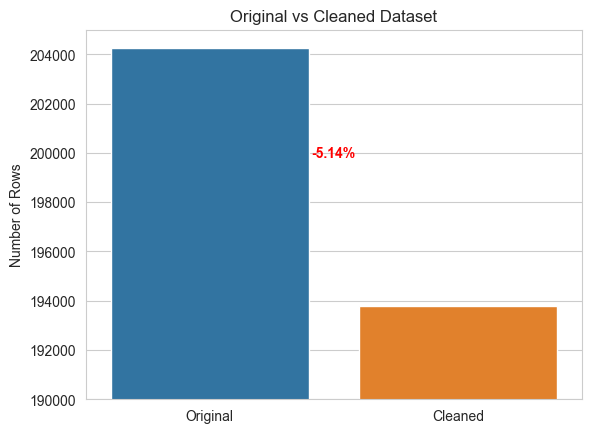

In [51]:
# Using Seaborn and inputing data values
x_labels = ['Original', 'Cleaned']
x_values = [204267, 193776]

#Get the percentage Difference for the before and after
percent = round((x_values[1] - x_values[0]) / x_values[0] * 100, 2)
percentage_text = f'{percent}%'

sns.set_style("whitegrid")
sns.barplot(x=x_labels, y=x_values)
plt.title('Original vs Cleaned Dataset')
plt.ylabel('Number of Rows')
plt.ylim(190000, 205000)
#Just to position a value of how much the dataset has srunk
plt.text(0.5, 200000, percentage_text, ha='center', va='center', fontweight='bold', color='red') 
plt.show()

Based on the chart above we have shrunk our data set by 5.14%. 

In [52]:
# Now that i am happy with the Dataset will save the new Dataset as Cleaned_TSA_claims.csv.
# This will enable us to use it in Tableau

df.to_csv("cleaned_TSA_claims.csv", index=True )

### 2.1 What are the most common types of claims filed with the TSA, and how has it changed over time?

We will use seaborn to viusally see what is the frequency of types of claims reported. 

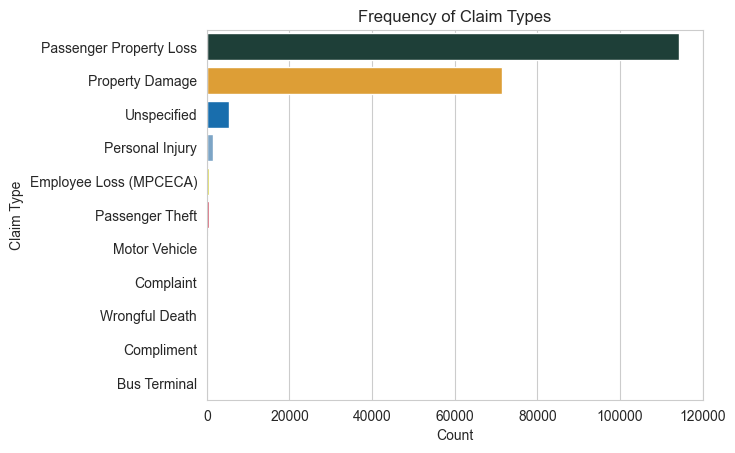

In [53]:
#TSA corporate colors 
tsa_colors = ['#18453B', '#F9A51A', '#0072C6', '#71A6D2', '#F0E90A', '#E31937']

#Set Seaborn to use the color pallet based on the code
tsa_palette = sns.color_palette(tsa_colors)

# chart a horizontal bar chart 
sns.countplot(y='Claim Type', data=df, order=df['Claim Type'].value_counts().index, palette=tsa_palette)

# Setting the labels
plt.title('Frequency of Claim Types')
plt.xlabel('Count')
plt.ylabel('Claim Type')

plt.savefig('claim_types.png', dpi=300, bbox_inches='tight')
plt.show()

We can see that the Top Claims reported is Passenger Property Loss, Property Damange and Unspecified. 
<br>
<br>
We will proceed to check year on year to check if they have been consistant amoungs these three values.


### 2.1.1 Year on Year Comparison

In [54]:
# Group the data by year and claim type, and calculate the count of each claim type
claim_counts = df.groupby(['Year', 'Claim Type']).size().reset_index(name='Count')

# Pivot the data to create a table with years as rows and claim types as columns
claim_table = claim_counts.pivot(index='Year', columns='Claim Type', values='Count').fillna(0)

claim_table

Claim Type,Bus Terminal,Complaint,Compliment,Employee Loss (MPCECA),Motor Vehicle,Passenger Property Loss,Passenger Theft,Personal Injury,Property Damage,Unspecified,Wrongful Death
Year,,,,,,,,,,,
2002,0.0,0.0,0.0,0.0,1.0,171.0,2.0,13.0,336.0,331.0,0.0
2003,0.0,0.0,0.0,13.0,2.0,6944.0,15.0,112.0,7997.0,2308.0,0.0
2004,0.0,0.0,0.0,301.0,13.0,13445.0,403.0,135.0,11414.0,1904.0,0.0
2005,0.0,0.0,0.0,70.0,20.0,14456.0,11.0,110.0,8625.0,388.0,0.0
2006,0.0,0.0,0.0,22.0,12.0,12241.0,3.0,100.0,5997.0,193.0,0.0
2007,0.0,0.0,0.0,13.0,34.0,12683.0,2.0,108.0,5396.0,75.0,0.0
2008,0.0,0.0,0.0,15.0,24.0,11080.0,2.0,123.0,4964.0,46.0,0.0
2009,0.0,0.0,0.0,9.0,31.0,8237.0,20.0,116.0,4133.0,53.0,0.0
2010,0.0,0.0,0.0,5.0,34.0,7026.0,0.0,64.0,3688.0,11.0,0.0


<Figure size 1500x1000 with 0 Axes>

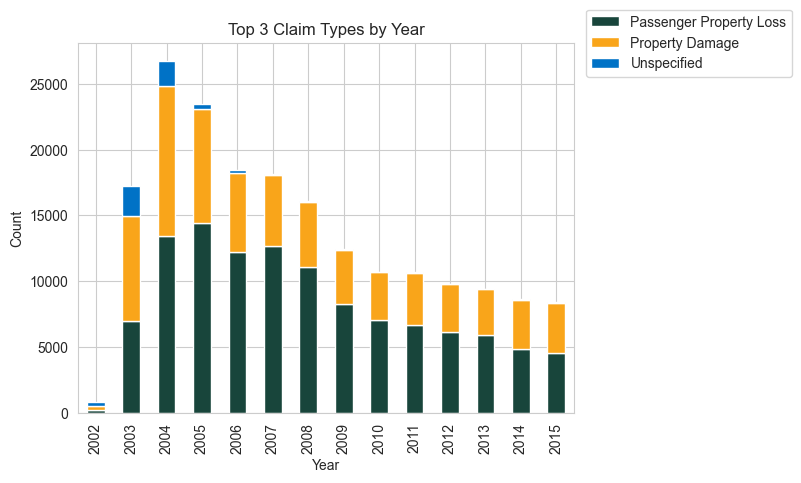

In [55]:

tsa_palette = sns.color_palette(tsa_colors)

# Only want Propert Damange, Passenger Property Loss and Unspecified
claim_types = ['Property Damage', 'Passenger Property Loss', 'Unspecified']
df_filtered = df[df['Claim Type'].isin(claim_types)]

# Group by Year and claim type
df_grouped = df_filtered.groupby(['Year', 'Claim Type']).size().reset_index(name='Count')

# Use a Pivot Table to allocate accordingly so its easier to chart
df_pivot = df_grouped.pivot(index='Year', columns='Claim Type', values='Count').fillna(0)

# set it so we can save it and use it later
plt.figure(figsize=(15, 10))

# Create a stacked bar chart of the claim types by year
ax = df_pivot.plot(kind='bar', stacked=True, color=tsa_palette)

# Set the plot title and axis labels
plt.title('Top 3 Claim Types by Year')
plt.xlabel('Year')
plt.ylabel('Count')

# Move the legend outside the plot area
ax.legend(loc='center left', bbox_to_anchor=(1.01, 1))
plt.savefig('claim_types_year.png', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()

<Figure size 1500x1000 with 0 Axes>

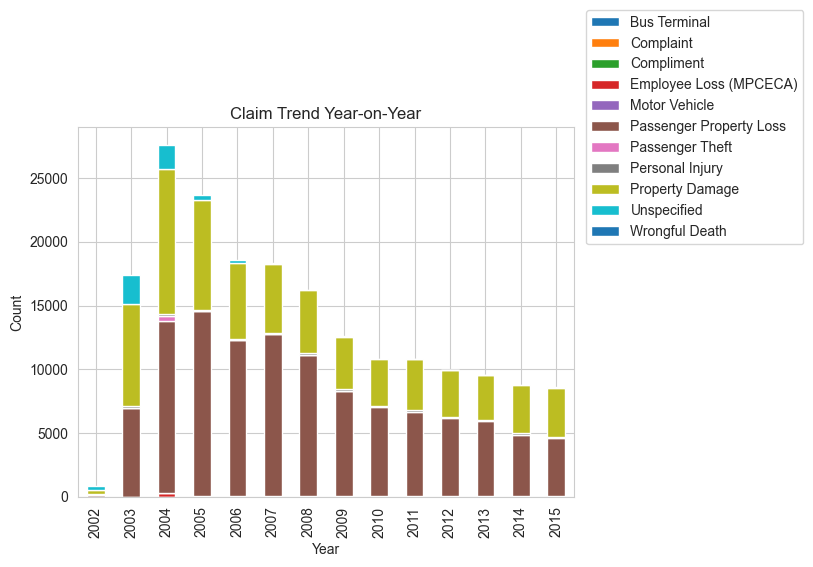

In [56]:


# Only want Propert Damange, Passenger Property Loss and Unspecified
claim_types = ['Property Damage', 'Passenger Property Loss', 'Unspecified',
       'Personal Injury', 'Motor Vehicle', 'Passenger Theft',
       'Employee Loss (MPCECA)', 'Wrongful Death', 'Bus Terminal',
       'Complaint', 'Compliment']
df_filtered = df[df['Claim Type'].isin(claim_types)]

# Group by Year and claim type
df_grouped = df_filtered.groupby(['Year', 'Claim Type']).size().reset_index(name='Count')

# Use a Pivot Table to allocate accordingly so its easier to chart
df_pivot = df_grouped.pivot(index='Year', columns='Claim Type', values='Count').fillna(0)

# set it so we can save it and use it later
plt.figure(figsize=(15, 10))

# Create a stacked bar chart of the claim types by year
ax = df_pivot.plot(kind='bar', stacked=True)

# Set the plot title and axis labels
plt.title('Claim Trend Year-on-Year')
plt.xlabel('Year')
plt.ylabel('Count')

# Move the legend outside the plot area
ax.legend(loc='center left', bbox_to_anchor=(1.01, 1))
plt.savefig('claim_types_Trend.png', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()

### 2.1.2 Insights
We can see that overall: 
1. Passenger Property Loss is the highest amounts of claims filed against the TSA.
<br>
Followed by Passenger Property Damange.

2. Trend overall indcates that claims have been slowly declining over the years. This is probably due to introduction of new screening technique such as the full-body scanner that was slowly introduced in 2007. Than wildly adopted in 2010.
3. 2002 was low because that was when the TSA was introduced and the general public were getting to know them. 
4. The sharpe peak from 2002 to 2005 generally suggested more incidents happened and that the general public were familiar with the organization. 
5. Unspecified Claim Types have occured less often in 2006.

Over all the trends suggest that claims have been in a decreasing trend and that the TSA have been getting at their jobs in carrying out screening processes.
<br> 
<br>
We should also compare:-

- Disposition share over the years. This shows us the count of successful closed cases have occured. 
- Where the claims have been happening by Claim Site.
- Average settlement amount to reimburse trends year on year.
- Which top 10 Airports the TSA should focus on.
- what are the top 10 airlines we can suspect of malpracticeses that have caused these claims to occur. 

###### 2. __Transportation Security Administration. (2010, October 29). TSA Administrator Pistole testifies before Senate on aviation security. Retrieved March 24, 2023, from https://www.tsa.gov/news/press/testimony/tsa-administrator-pistole-testifies-senate-aviation-security__

#### 2.2.1 Dispostion share over the Years
Just like before we did by claim type by year we will just switch the variable claim type to Dispostion count.

<Figure size 1500x1000 with 0 Axes>

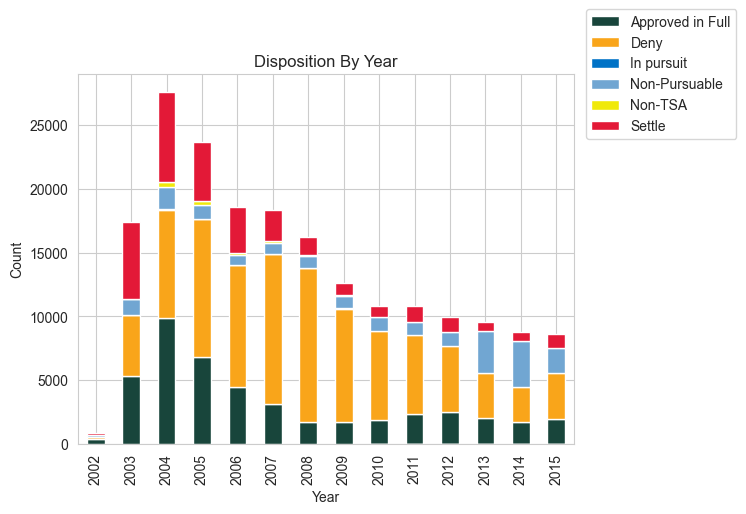

In [57]:

# Group them based by year for count of types of claim
df_grouped = df.groupby(['Year', 'Disposition']).size().reset_index(name='Count')

# Use a Pivot Table to allocate accordingly so its easier to chart
df_pivot = df_grouped.pivot(index='Year', columns='Disposition', values='Count').fillna(0)

# set it so we can save it and use it later
plt.figure(figsize=(15, 10))

# Create a stacked bar chart of the claim types by year
ax = df_pivot.plot(kind='bar', stacked=True, color=tsa_palette)

# Set the plot title and axis labels
plt.title('Disposition By Year')
plt.xlabel('Year')
plt.ylabel('Count')

# Move the legend outside the plot area
ax.legend(loc='center left', bbox_to_anchor=(1.01, 1))

# Show the plot
plt.show()

2002 is dwarfed compared to the other bar charts and thus we will prepare a pie chart to get a share

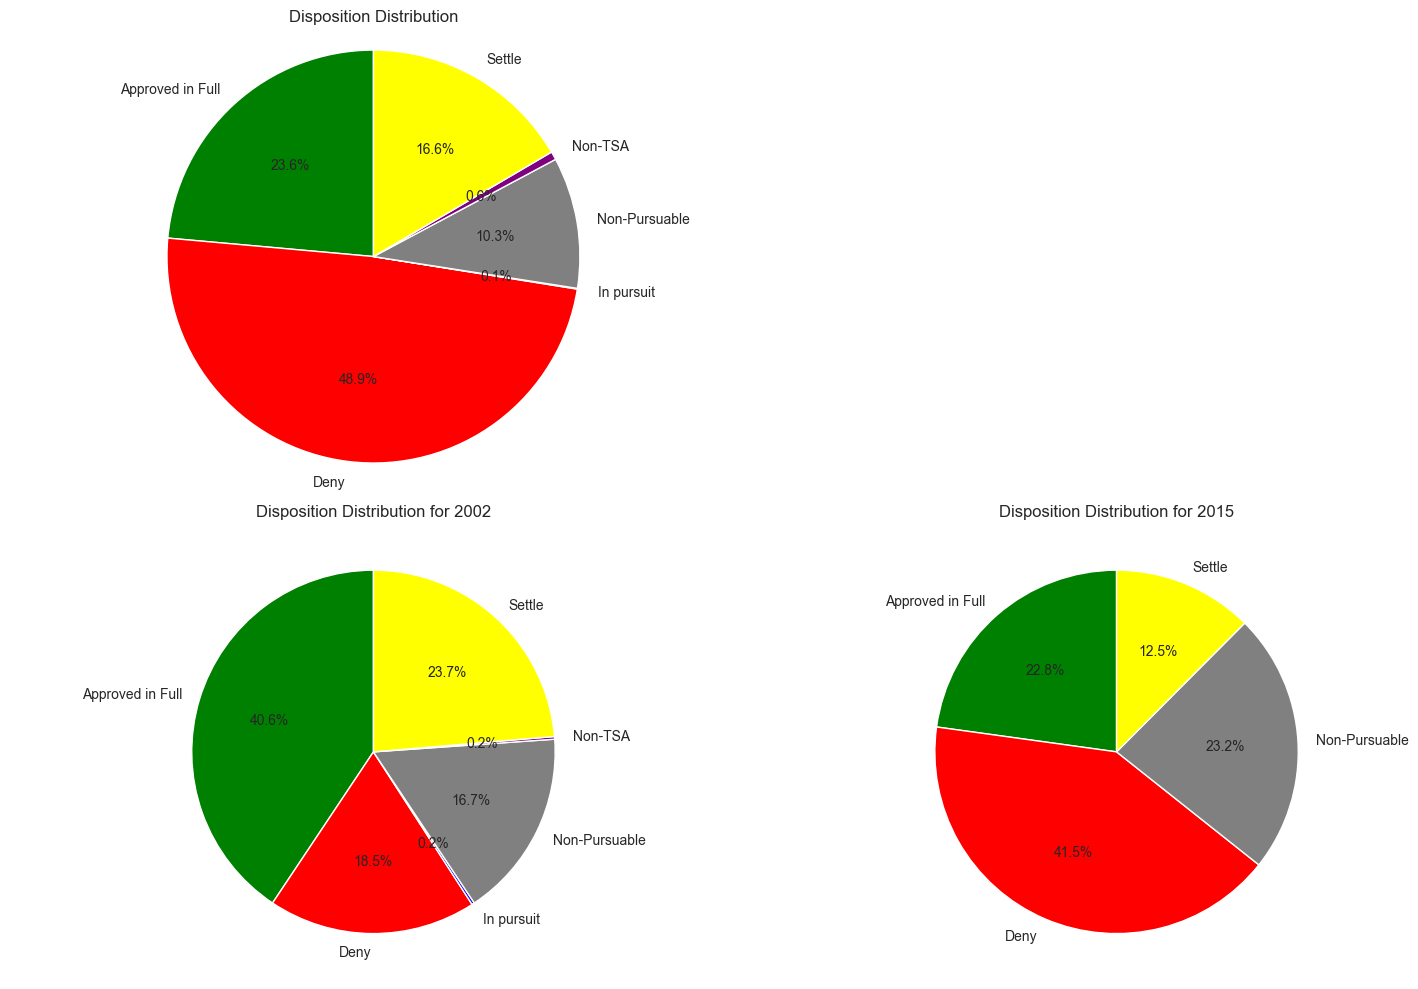

In [58]:
colors = {'Approved in Full': 'green',
          'Settle': 'yellow',
          'Non-Pursuable': 'grey',
          'Deny': 'red',
          'In pursuit': 'blue',
          'Non-TSA': 'purple'}

# Filter the dataframe to include only data for the year 2002
df_2002 = df[df['Year'] == 2002]

# Filter the dataframe to include only data for the year 2015
df_2015 = df[df['Year'] == 2015]

# Group the data by disposition and count the number of occurrences
disposition_counts = df.groupby('Disposition').size().reset_index(name='Count')
disposition_counts_2002 = df_2002.groupby('Disposition').size().reset_index(name='Count')
disposition_counts_2015 = df_2015.groupby('Disposition').size().reset_index(name='Count')

# Set the labels for the pie charts
labels = disposition_counts['Disposition']
labels1 = disposition_counts_2002['Disposition']
labels2 = disposition_counts_2015['Disposition']

# Set up the figure and axes
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Create the pie chart for all years
axs[0, 0].pie(disposition_counts['Count'], labels=labels, colors=[colors[label] for label in labels], autopct='%1.1f%%', startangle=90)
axs[0, 0].set_title('Disposition Distribution')
axs[0, 0].axis('equal')
axs[0, 1].remove()

# Create the pie chart for 2002
axs[1, 0].pie(disposition_counts_2002['Count'], labels=labels1, colors=[colors[label] for label in labels1], autopct='%1.1f%%', startangle=90)
axs[1, 0].set_title('Disposition Distribution for 2002')

# Create the pie chart for 2015
axs[1, 1].pie(disposition_counts_2015['Count'], labels=labels2, colors=[colors[label] for label in labels2], autopct='%1.1f%%', startangle=90)
axs[1, 1].set_title('Disposition Distribution for 2015')

# Adjust the layout
plt.tight_layout()
axs[0, 1].legend(labels, loc='center', title='Disposition', fontsize='medium')

# Show the plot
plt.show()



In [59]:
df['Disposition'].unique()

array(['Approved in Full', 'Settle', 'Non-Pursuable', 'Deny',
       'In pursuit', 'Non-TSA'], dtype=object)

We can inference that approvals have been decreasing comparing the begining of the year until the latest year of our dataset. Where more claims have been denied been increasing. 

#### 2.2.2 Claim Site Occurances

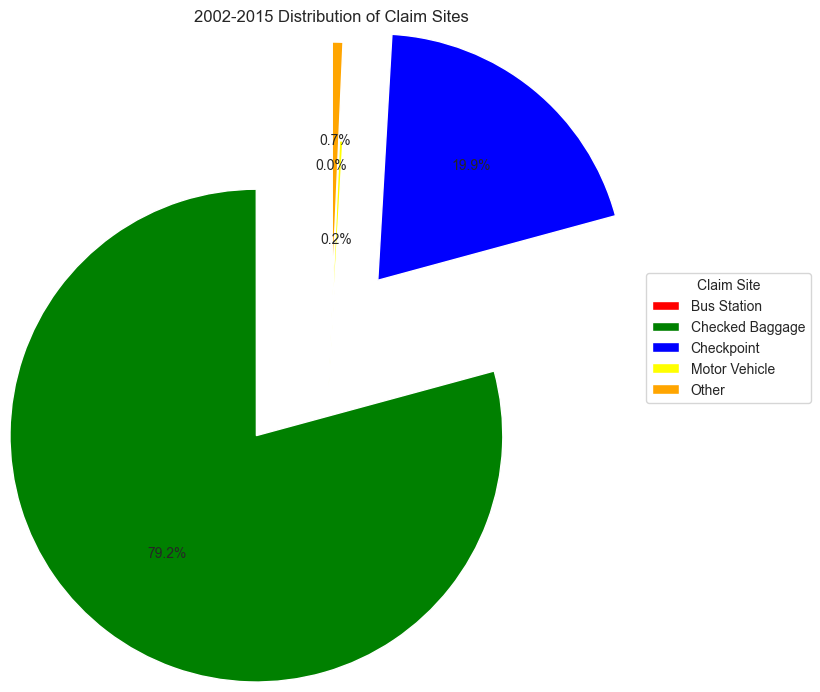

In [60]:

# group the data by claim type and count the number of occurrences
claim_type_count = df.groupby('Claim Site').size().reset_index(name='Count')

# specify the labels and colors for the pie chart
labels = claim_type_count['Claim Site']
colors = ['red', 'green', 'blue', 'yellow', 'orange', 'purple']

# specify the explode parameter (0 for all wedges except the second one)
explode = (0.1,0.5,0.3,-0.2,0.2)


# create the figure and axes
fig, ax = plt.subplots(figsize=(8, 8))

# create the pie chart (set labels to None)
wedges, texts, autotexts = ax.pie(claim_type_count['Count'], labels=None, explode=explode, colors=colors, autopct='%1.1f%%', startangle=90)

# add a legend to the chart
ax.legend(wedges, labels, title='Claim Site', loc='center left', bbox_to_anchor=(1, 0.5))

# add a title to the chart
ax.set_title('2002-2015 Distribution of Claim Sites')

# display the chart
plt.show()

We can see the majority of the claims have had occurances after passengers have checked in their luggage with the airlines. 
<br>
<br>
We should see what is the distribution year on year. 

<Figure size 1500x1000 with 0 Axes>

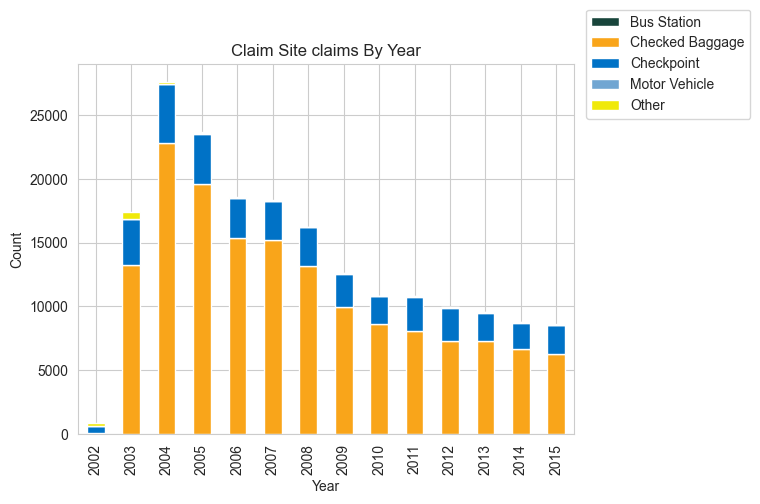

In [61]:
tsa_palette = sns.color_palette(tsa_colors)
# Group them based by year for count of types of claim
df_grouped = df.groupby(['Year', 'Claim Site']).size().reset_index(name='Count')

# Use a Pivot Table to allocate accordingly so its easier to chart
df_pivot = df_grouped.pivot(index='Year', columns='Claim Site', values='Count').fillna(0)

# set it so we can save it and use it later
plt.figure(figsize=(15, 10))

# Create a stacked bar chart of the claim types by year
ax = df_pivot.plot(kind='bar', stacked=True, color=tsa_palette)

# Set the plot title and axis labels
plt.title('Claim Site claims By Year')
plt.xlabel('Year')
plt.ylabel('Count')

# Move the legend outside the plot area
ax.legend(loc='center left', bbox_to_anchor=(1.01, 1))

plt.savefig('claim_Site_Trend.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

Again year on year we see that the majority of claims happen during the check in baggage section of airtravel. 
<br>

#### Suggestion
We can see that as claims have been decreasing so as well claim site occurances. Overall, claims filed against the tsa in the check Baggage stage still takes a majority. But our suggestion would be to introduce more touchless screening techinques to bring down claims and to also focus more resources in screaning process at the checked baggage area. 
<br>
<br>
We will try and investigate what are the top 10 items that usually get claimed against the TSA. To see how if we can gather insight on what the TSA can advise travels not to travel with in their checked Baggage. 

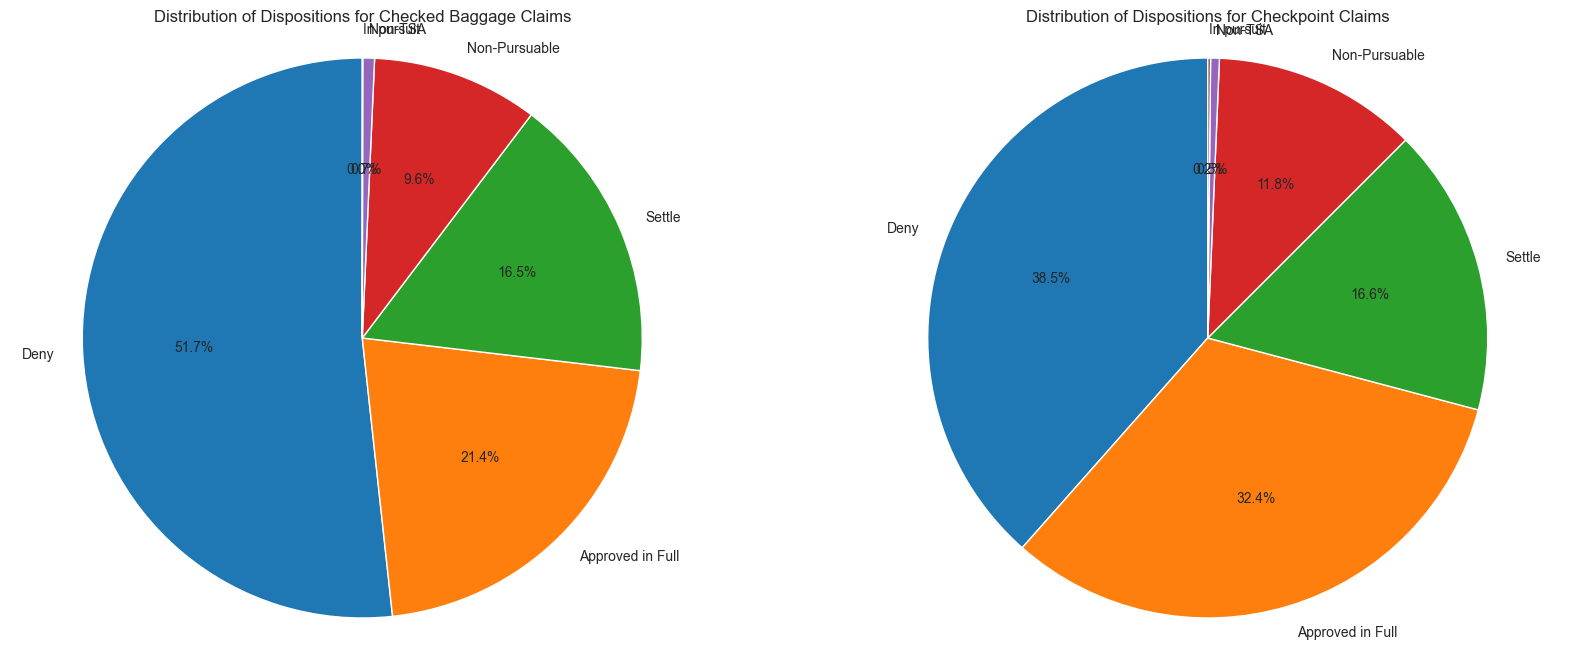

In [62]:
# Subset the data to only include claims that occurred at Checked Baggage sites
df_CB_site = df[df['Claim Site'] == 'Checked Baggage']

# Create a pie chart showing the distribution of dispositions for Checked Baggage claims
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
dispositions_CB = df_CB_site.groupby('Disposition')['Claim Number'].count().sort_values(ascending=False)
plt.pie(dispositions_CB.values, labels=dispositions_CB.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Distribution of Dispositions for Checked Baggage Claims')

# Subset the data to only include claims that occurred at Checkpoint sites
df_CP_site = df[df['Claim Site'] == 'Checkpoint']

# Create a pie chart showing the distribution of dispositions for Checkpoint claims
plt.subplot(1, 2, 2)
dispositions_CP = df_CP_site.groupby('Disposition')['Claim Number'].count().sort_values(ascending=False)
plt.pie(dispositions_CP.values, labels=dispositions_CP.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Distribution of Dispositions for Checkpoint Claims')


plt.savefig('claim_Site_Pie.png', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()


In [63]:
from scipy.stats import chi2_contingency
# Create a contingency table
contingency_table = pd.crosstab(df['Claim Site'], df['Disposition'])

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Convert the contingency table into a pandas DataFrame
contingency_df = pd.DataFrame(contingency_table)

# Print the contingency table

contingency_df

Disposition,Approved in Full,Deny,In pursuit,Non-Pursuable,Non-TSA,Settle
Claim Site,,,,,,
Bus Station,1,8,0,6,0,0
Checked Baggage,32867,79398,41,14754,1036,25402
Checkpoint,12466,14808,63,4553,194,6403
Motor Vehicle,172,48,3,142,0,67
Other,177,500,7,440,11,209


In [64]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['Claim Site'], df['Disposition'])

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Set the significance level
alpha = 0.05

# Convert the contingency table to a pandas DataFrame
contingency_df = pd.DataFrame(contingency_table)

# Display the results
display(contingency_df)
print('\nChi-Squared Test Results:')
results = pd.DataFrame({'Chi-Squared': [chi2],
                        'Degrees of Freedom': [dof],
                        'P-value': [p]})
display(results)

# Determine if the null hypothesis should be rejected
if p < alpha:
    print('\nReject the null hypothesis.')
else:
    print('\nFail to reject the null hypothesis.')

Disposition,Approved in Full,Deny,In pursuit,Non-Pursuable,Non-TSA,Settle
Claim Site,,,,,,
Bus Station,1,8,0,6,0,0
Checked Baggage,32867,79398,41,14754,1036,25402
Checkpoint,12466,14808,63,4553,194,6403
Motor Vehicle,172,48,3,142,0,67
Other,177,500,7,440,11,209



Chi-Squared Test Results:


,Chi-Squared,Degrees of Freedom,P-value
0,4198.025219,20,0.0



Reject the null hypothesis.


In [65]:
# Create a new dataframe with claim site and percentage of approved claims
df_approved = pd.DataFrame({'Claim Site': contingency_table.index, 
                             'Percentage Approved': contingency_table['Approved in Full'] / contingency_table.sum(axis=1) * 100})

# Round the percentage to 2 decimal places
df_approved['Percentage Approved'] = df_approved['Percentage Approved'].round(2)

# Sort the dataframe in descending order by percentage of approved claims
df_approved_sorted = df_approved.sort_values(by='Percentage Approved', ascending=False)
df_approved_sorted.reset_index(drop=True, inplace=True)

df_approved_sorted

,Claim Site,Percentage Approved
0,Motor Vehicle,39.81
1,Checkpoint,32.39
2,Checked Baggage,21.41
3,Other,13.17
4,Bus Station,6.67


In [66]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['Claim Type'], df['Disposition'])

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Set the significance level
alpha = 0.05

# Convert the contingency table to a pandas DataFrame
contingency_df = pd.DataFrame(contingency_table)

# Display the results
display(contingency_df)
print('\nChi-Squared Test Results:')
results = pd.DataFrame({'Chi-Squared': [chi2],
                        'Degrees of Freedom': [dof],
                        'P-value': [p]})
display(results)

# Determine if the null hypothesis should be rejected
if p < alpha:
    print('\nReject the null hypothesis.')
else:
    print('\nFail to reject the null hypothesis.')

Disposition,Approved in Full,Deny,In pursuit,Non-Pursuable,Non-TSA,Settle
Claim Type,,,,,,
Bus Terminal,0,0,0,0,0,1
Complaint,5,8,0,31,0,0
Compliment,0,0,0,2,0,0
Employee Loss (MPCECA),176,152,2,39,9,96
Motor Vehicle,143,48,1,96,0,45
Passenger Property Loss,22883,61565,39,12957,811,16038
Passenger Theft,139,177,0,26,5,111
Personal Injury,91,656,52,453,7,154
Property Damage,20827,30599,16,5597,388,13885



Chi-Squared Test Results:


,Chi-Squared,Degrees of Freedom,P-value
0,9972.175849,50,0.0



Reject the null hypothesis.


In [67]:
# Create a new dataframe with claim site and percentage of approved claims
df_approved = pd.DataFrame({'Claim Type': contingency_table.index, 
                             'Percentage Approved': contingency_table['Approved in Full'] / contingency_table.sum(axis=1) * 100})

# Round the percentage to 2 decimal places
df_approved['Percentage Approved'] = df_approved['Percentage Approved'].round(2)

# Sort the dataframe in descending order by percentage of approved claims
df_approved_sorted = df_approved.sort_values(by='Percentage Approved', ascending=False)
df_approved_sorted.reset_index(drop=True, inplace=True)

df_approved_sorted

,Claim Type,Percentage Approved
0,Motor Vehicle,42.94
1,Employee Loss (MPCECA),37.13
2,Passenger Theft,30.35
3,Property Damage,29.21
4,Unspecified,26.07
5,Passenger Property Loss,20.02
6,Complaint,11.36
7,Personal Injury,6.44
8,Bus Terminal,0.00
9,Compliment,0.00


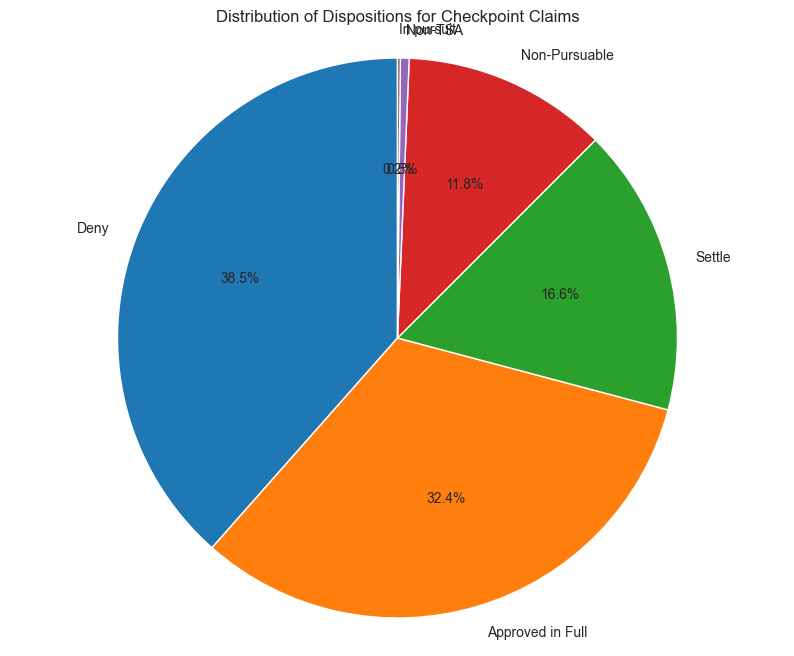

In [68]:
df_CP_Site = df[df['Claim Site'] == 'Checkpoint']
plt.figure(figsize=(10, 8))
dispositions = df_CP_Site.groupby('Disposition')['Claim Number'].count().sort_values(ascending=False)
plt.pie(dispositions.values, labels=dispositions.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Distribution of Dispositions for Checkpoint Claims')
plt.show()

In [69]:
# Seperate the strings by using split on "; "
items_split = df['Item'].str.split('; ', expand=True)

# stack the columns and count the occurrences of each item
items_count = items_split.stack().value_counts()

# Do not count Other, etc and - 
items_count_filtered = items_count.drop(labels=[ 'Other','etc.', '-'])

# group the items by name and sum 
items_count_combined = items_count_filtered.groupby(level=0).sum()

# sort from big to small
items_count_combined = items_count_combined.sort_values(ascending=False)

# Just get the top 10 items that were claimed against the TSA 
df_item_top10 = pd.DataFrame({'item type': items_count_combined.index, 
                              'item count': items_count_combined.values})
df_item_top10.to_csv('item_count_top10.csv', index=True)

In [70]:
df['Disposition'].unique()

array(['Approved in Full', 'Settle', 'Non-Pursuable', 'Deny',
       'In pursuit', 'Non-TSA'], dtype=object)

In [71]:
# Split items and create a new dataframe with one item per row
items_split = df['Item'].str.split('; ', expand=True)
df_items_split = items_split.stack().reset_index(level=1, drop=True).to_frame('Item')

# Combine the split items dataframe with the original dataframe
df_combined = df.drop('Item', axis=1).join(df_items_split)

# Count items by Disposition
item_counts = df_combined.groupby(['Item', 'Disposition']).size().reset_index(name='Item Count')

# Pivot the item counts by Disposition
item_pivot = item_counts.pivot_table(values='Item Count', index='Item', columns='Disposition', fill_value=0).reset_index()

# Calculate the total count for each item
item_pivot['Total Count'] = item_pivot.iloc[:, 1:].sum(axis=1)

# Exclude rows with value of 'etc.'
item_pivot = item_pivot[item_pivot['Item'] != 'etc.']


columns_order = [ 'Item', 'Total Count','Approved in Full', 'Settle', 'Non-Pursuable', 'Deny',
       'In pursuit', 'Non-TSA']
item_pivot = item_pivot[columns_order]

# Sort by Total Count from biggest to smallest
item_pivot.sort_values(by='Total Count', ascending=False, inplace=True)

item_pivot.head(10)

# Save the dataframe to a CSV file
item_pivot.to_csv('Item_Count_disposition.csv', index=False)

print("Item_Count_disposition saved as CSV file.")

Item_Count_disposition saved as CSV file.


In [72]:
# Split items and create a new dataframe with one item per row
items_split = df['Item'].str.split('; ', expand=True)
df_items_split = items_split.stack().reset_index(level=1, drop=True).to_frame('Item')

# Combine the split items dataframe with the original dataframe
df_combined = df.drop('Item', axis=1).join(df_items_split)

# Count items by Claim Site
item_counts = df_combined.groupby(['Item', 'Claim Site']).size().reset_index(name='Item Count')

# Pivot the item counts by Claim Site
item_pivot = item_counts.pivot_table(values='Item Count', index='Item', columns='Claim Site', fill_value=0).reset_index()

# Calculate the total count for each item
item_pivot['Total Count'] = item_pivot.iloc[:, 1:].sum(axis=1)

# Exclude rows with value 'etc.'
item_pivot = item_pivot[item_pivot['Item'] != 'etc.']

columns_order = ['Item', 'Total Count', 'Checkpoint', 'Checked Baggage', 'Other', 'Motor Vehicle', 'Bus Station']
item_pivot = item_pivot[columns_order]

# Sort by Total Count from biggest to smallest
item_pivot.sort_values(by='Total Count', ascending=False, inplace=True)


# Save the dataframe to a CSV file
item_pivot.to_csv('Item_Count_Site.csv', index=False)

item_pivot.head(10)
# print("Item_Count_disposition saved as CSV file.")

Claim Site,Item,Total Count,Checkpoint,Checked Baggage,Other,Motor Vehicle,Bus Station
138,Other,41033,5826,34741,338,123,5
119,Luggage (all types including footlockers),19554,1999,17336,219,0,0
198,belts,17287,2394,14770,122,1,0
196,accessories,17287,2394,14770,122,1,0
57,Clothing - Shoes,17287,2394,14770,122,1,0
41,Cameras - Digital,11510,1487,9965,58,0,0
106,Jewelry - Fine,10726,2708,7936,81,1,0
118,Locks,10366,167,10168,31,0,0
61,Computer - Laptop,9140,3262,5809,69,0,0
14,Baggage/Cases/Purses,8488,917,7561,6,1,3


In [73]:
df["Claim Site"].unique()

array(['Checkpoint', 'Checked Baggage', 'Other', 'Motor Vehicle',
       'Bus Station'], dtype=object)

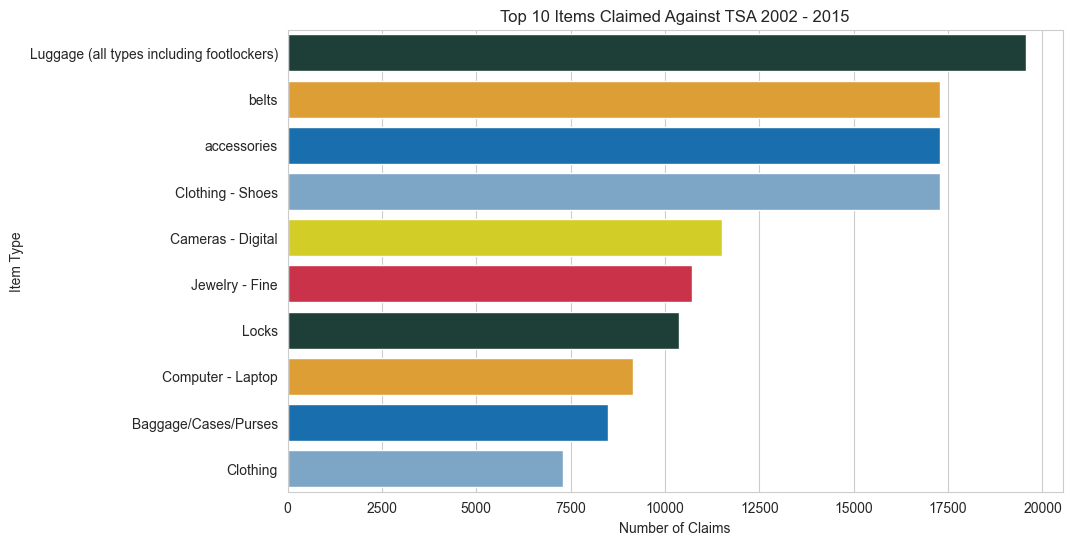

In [74]:
# Just testing to see if it works
df_item_top10 = pd.DataFrame({'Item Type': items_count_combined.index[:10], 
                               'Item Count': items_count_combined.values[:10]})

df_item_top10.columns = df_item_top10.columns.str.strip()

plt.figure(figsize=(10, 6))
sns.barplot(x='Item Count', y='Item Type', data=df_item_top10, palette=tsa_colors)
plt.xlabel('Number of Claims')
plt.ylabel('Item Type')
plt.title('Top 10 Items Claimed Against TSA 2002 - 2015')
plt.savefig('Items_claimed.png', dpi=300, bbox_inches='tight')
plt.show()

In [75]:

df_item_approve_checkedBaggage = df[(df['Disposition'] == "Approved in Full") & (df['Claim Site'] == "Checked Baggage")]


items_split = df_item_approve_checkedBaggage['Item'].str.split('; ', expand=True)
items_count = items_split.stack().value_counts()


items_count_filtered = items_count.drop(labels=[ 'Other','etc.', '-'])
items_count_combined = items_count_filtered.groupby(level=0).sum()


items_count_combined = items_count_combined.sort_values(ascending=False)
df_item_top10_CB_Approve= pd.DataFrame({'Item Type': items_count_combined.index[:10], 
                              'Item Count': items_count_combined.values[:10]})


df_item_top10_CB_Approve

,Item Type,Item Count
0,Locks,4073
1,accessories,3944
2,Clothing - Shoes,3944
3,belts,3944
4,Luggage (all types including footlockers),3703
5,Travel Accessories,1820
6,Baggage/Cases/Purses,1128
7,Clothing,1117
8,Jewelry - Fine,974
9,Cameras - Digital,653


In [76]:
# List to check desired Items to compare
desired_items = ['belts', 'accessories', 'Clothing - Shoes', 'Cameras - Digital', 'Jewelry - Fine', 'Locks', 'Computer - Laptop', 'Baggage/Cases/Purses', 'Clothing']

# Create a dataframe for Approved in Full claims for Checkpoint
df_item_approve_checkpoint = df[(df['Disposition'] == "Approved in Full") & (df['Claim Site'] == "Checkpoint")]

# Split the items and count the occurrences
items_split = df_item_approve_checkpoint['Item'].str.split('; ', expand=True)
items_count = items_split.stack().value_counts()

# Filter and combine the desired items
items_count_filtered = items_count.drop(labels=[ 'Other','etc.'])
items_count_filtered = items_count_filtered[items_count_filtered.index.isin(desired_items)]
items_count_combined_approve = items_count_filtered.groupby(level=0).sum()

# Create a dataframe for Denied claims for Checkpoint
df_item_deny_checkpoint = df[(df['Disposition'] == "Deny") & (df['Claim Site'] == "Checkpoint")]

# Split the items and count the occurrences
items_split = df_item_deny_checkpoint['Item'].str.split('; ', expand=True)
items_count = items_split.stack().value_counts()

# Filter and combine the desired items
items_count_filtered = items_count.drop(labels=[ 'Other','etc.'])
items_count_filtered = items_count_filtered[items_count_filtered.index.isin(desired_items)]
items_count_combined_deny = items_count_filtered.groupby(level=0).sum()

# Create the final dataframe
df_item_compare_CP = pd.DataFrame({'Item Type': desired_items,
                                   'Item Count Approve': items_count_combined_approve.values,
                                   'Item Count Deny': items_count_combined_deny.values})
df_item_compare_CP['Total Count'] = df_item_compare_CP['Item Count Approve'] + df_item_compare_CP['Item Count Deny']

# Sort the dataframe by the total count of each item
df_item_compare_CP.sort_values(by='Total Count', ascending=False, inplace=True)

# Print the dataframe
df_item_compare_CP




,Item Type,Item Count Approve,Item Count Deny,Total Count
5,Locks,624,1554,2178
4,Jewelry - Fine,763,1305,2068
3,Cameras - Digital,1076,834,1910
7,Baggage/Cases/Purses,1076,834,1910
8,Clothing,1076,834,1910
1,accessories,283,767,1050
2,Clothing - Shoes,383,333,716
0,belts,425,180,605
6,Computer - Laptop,77,62,139


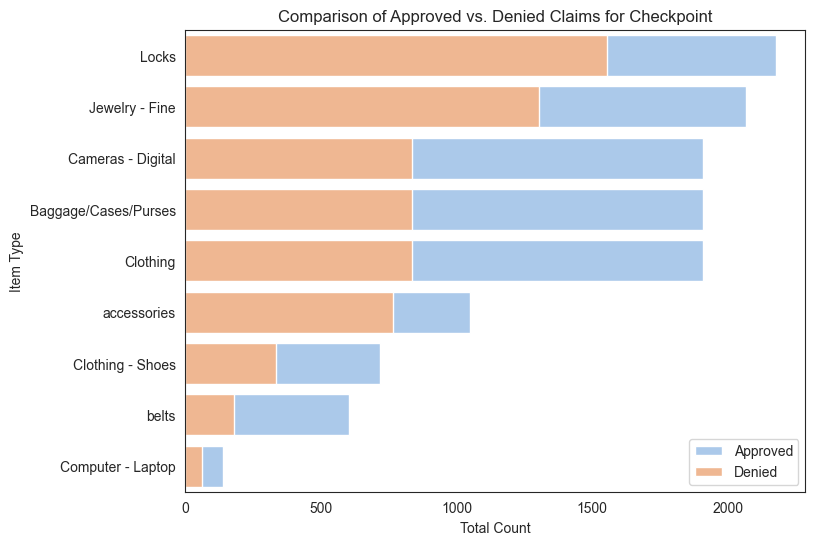

In [77]:
# Set style
sns.set_style('white')

# Create figure and axes objects
fig, ax = plt.subplots(figsize=(8, 6))

# Define colors for the bars
colors = sns.color_palette('pastel', n_colors=2)

# Plot the bars
sns.barplot(x='Total Count', y='Item Type', data=df_item_compare_CP, color=colors[0], label='Approved')
sns.barplot(x='Item Count Deny', y='Item Type', data=df_item_compare_CP, color=colors[1], label='Denied')

# Set axis labels and title
ax.set_xlabel('Total Count')
ax.set_ylabel('Item Type')
ax.set_title('Comparison of Approved vs. Denied Claims for Checkpoint')


ax.legend()

plt.savefig('Items_apprvsdeny_checkpoint.png', dpi=300, bbox_inches='tight')
plt.show()


In [78]:
# Create a list of the desired items
desired_items = ['belts', 'accessories', 'Clothing - Shoes', 'Cameras - Digital', 'Jewelry - Fine', 'Locks', 'Computer - Laptop', 'Baggage/Cases/Purses', 'Clothing']


df_item_approve_checkpoint = df[(df['Disposition'] == "Approved in Full") & (df['Claim Site'] == "Checked Baggage")]

items_split = df_item_approve_checkpoint['Item'].str.split('; ', expand=True)
items_count = items_split.stack().value_counts()


items_count_filtered = items_count.drop(labels=[ 'Other','etc.'])
items_count_filtered = items_count_filtered[items_count_filtered.index.isin(desired_items)]
items_count_combined_approve = items_count_filtered.groupby(level=0).sum()


df_item_deny_checkedBaggage = df[(df['Disposition'] == "Deny") & (df['Claim Site'] == "Checked Baggage")]

items_split = df_item_deny_checkedBaggage['Item'].str.split('; ', expand=True)
items_count = items_split.stack().value_counts()

items_count_filtered = items_count.drop(labels=[ 'Other','etc.'])
items_count_filtered = items_count_filtered[items_count_filtered.index.isin(desired_items)]
items_count_combined_deny = items_count_filtered.groupby(level=0).sum()

df_item_compare_CB = pd.DataFrame({'Item Type': desired_items,
                                   'Item Count Approve': items_count_combined_approve.values,
                                   'Item Count Deny': items_count_combined_deny.values})

df_item_compare_CB['Total Count'] = df_item_compare_CB['Item Count Approve'] + df_item_compare_CB['Item Count Deny']


df_item_compare_CB.sort_values(by='Item Type', ascending=False, inplace=True)

df_item_compare_CB

,Item Type,Item Count Approve,Item Count Deny,Total Count
0,belts,1128,4284,5412
1,accessories,653,6073,6726
5,Locks,974,4688,5662
4,Jewelry - Fine,272,4303,4575
6,Computer - Laptop,4073,5139,9212
2,Clothing - Shoes,1117,3540,4657
8,Clothing,3944,7112,11056
3,Cameras - Digital,3944,7112,11056
7,Baggage/Cases/Purses,3944,7112,11056


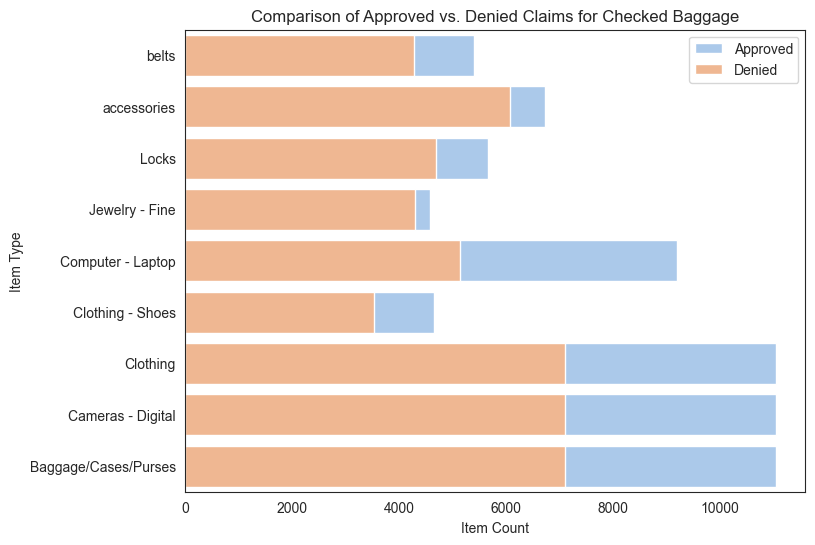

In [79]:

sns.set_style('white')

fig, ax = plt.subplots(figsize=(8, 6))

colors = sns.color_palette('pastel', n_colors=2)

sns.barplot(x='Total Count', y='Item Type', data=df_item_compare_CB, color=colors[0], label='Approved')
sns.barplot(x='Item Count Deny', y='Item Type', data=df_item_compare_CB, color=colors[1], label='Denied')

ax.set_xlabel('Item Count')
ax.set_ylabel('Item Type')
ax.set_title('Comparison of Approved vs. Denied Claims for Checked Baggage')


ax.legend()

plt.savefig('Items_apprvsdeny_checkedBaggae.png', dpi=300, bbox_inches='tight')
plt.show()



In [80]:
# Filter the data by Disposition and Claim Site
df_item_approve_checkedBaggage = df[(df['Disposition'] == "Approved in Full") & (df['Claim Site'] == "Checkpoint")]

# Split the items in the Item column and count their occurrences
items_split = df_item_approve_checkedBaggage['Item'].str.split('; ', expand=True)
items_count = items_split.stack().value_counts()

# Filter out unwanted items and group by item name
items_count_filtered = items_count.drop(labels=[ 'Other','etc.', '-'])
items_count_combined = items_count_filtered.groupby(level=0).sum()

# Sort the results and select the top 10 items
items_count_combined = items_count_combined.sort_values(ascending=False)
df_item_top10_CP_Approve = pd.DataFrame({'Item Type': items_count_combined.index[:10], 
                              'Item Count': items_count_combined.values[:10]})

# Print the results
df_item_top10_CP_Approve

,Item Type,Item Count
0,belts,1076
1,accessories,1076
2,Clothing - Shoes,1076
3,Luggage (all types including footlockers),935
4,Eyeglasses - (including contact lenses),913
5,Computer - Laptop,763
6,Jewelry - Fine,624
7,Computer & Accessories,543
8,Baggage/Cases/Purses,425
9,Personal Accessories,403


In [81]:
df_checked_baggage= df[df['Claim Site'] == 'Checked Baggage']

items_split_CB = df_checked_baggage['Item'].str.split('; ', expand=True)

# stack the columns and count the occurrences of each item
items_count_CB = items_split_CB.stack().value_counts()

# Do not count Other, etc and - 
items_count_CB_filtered = items_count_CB.drop(labels=[ 'Other','etc.', '-'])

# group the items by name and sum 
items_count_CB_combined = items_count_CB_filtered.groupby(level=0).sum()

# sort from big to small
items_count_CB_combined = items_count_CB_combined.sort_values(ascending=False)

df_CheckPoint= df[df['Claim Site'] == 'Checkpoint']

items_split_CP = df_CheckPoint['Item'].str.split('; ', expand=True)

# stack the columns and count the occurrences of each item
items_count_CP = items_split_CP.stack().value_counts()

# Do not count Other, etc and - 
items_count_CP_filtered = items_count_CP.drop(labels=[ 'Other','etc.', '-'])

# group the items by name and sum 
items_count_CP_combined = items_count_CP_filtered.groupby(level=0).sum()

# sort from big to small
items_count_CP_combined = items_count_CP_combined.sort_values(ascending=False)


# Just get the top 10 items that were claimed against the TSA 
df_item_top10_CB_N_CP = pd.DataFrame({'item type': items_count_CB_combined.index[:10], 
                              'item count_CB': items_count_CB_combined.values[:10],
                              'item count_CP': items_count_CP_combined.values[:10],
                              
                              })
df_item_top10_CB_N_CP

,item type,item count_CB,item count_CP
0,Luggage (all types including footlockers),17336,3262
1,Clothing - Shoes,14770,2708
2,accessories,14770,2396
3,belts,14770,2394
4,Locks,10168,2394
5,Cameras - Digital,9965,2394
6,Jewelry - Fine,7936,1999
7,Baggage/Cases/Purses,7561,1966
8,Clothing,6275,1814
9,Computer - Laptop,5809,1670


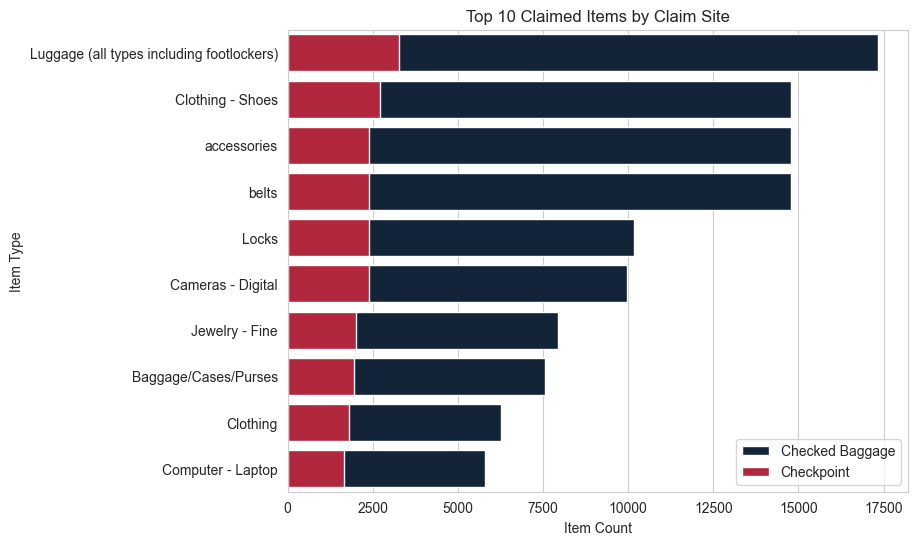

In [82]:
# Set the TSA corporate colors
TSA_colors = ["#0C2340", "#C8102E"]

# Create a horizontal bar chart
sns.set_style("whitegrid")
plt.figure(figsize=(8,6))
ax = sns.barplot(x="item count_CB", y="item type", data=df_item_top10_CB_N_CP, color=TSA_colors[0], label="Checked Baggage")
ax = sns.barplot(x="item count_CP", y="item type", data=df_item_top10_CB_N_CP, color=TSA_colors[1], label="Checkpoint")
ax.set_xlabel("Item Count")
ax.set_ylabel("Item Type")
ax.set_title("Top 10 Claimed Items by Claim Site")
plt.legend()
plt.savefig('Items_claim_site.png', dpi=300, bbox_inches='tight')
plt.show()

We look at the top 10 items claimed against the TSA and the Majority of them happens the most frequent with Luggage(all types including footlockers). Meaning its the bag themselves that get damanged during searches for both Site locations. 



#### Suggestion
We would suggest that the great opportunity for the TSA to conduct search on personal passenger bags is to develop new search techniques that are not invasive and only be handled when neccessary.
<br>
<br>
Another suggestion is to have passengers carry personal Electronics on them on all times in order to prevent them from being mishandled by the airlines and the TSA agents themselves. 

#### 2.2.4 Top 10 Airports the TSA should focus on

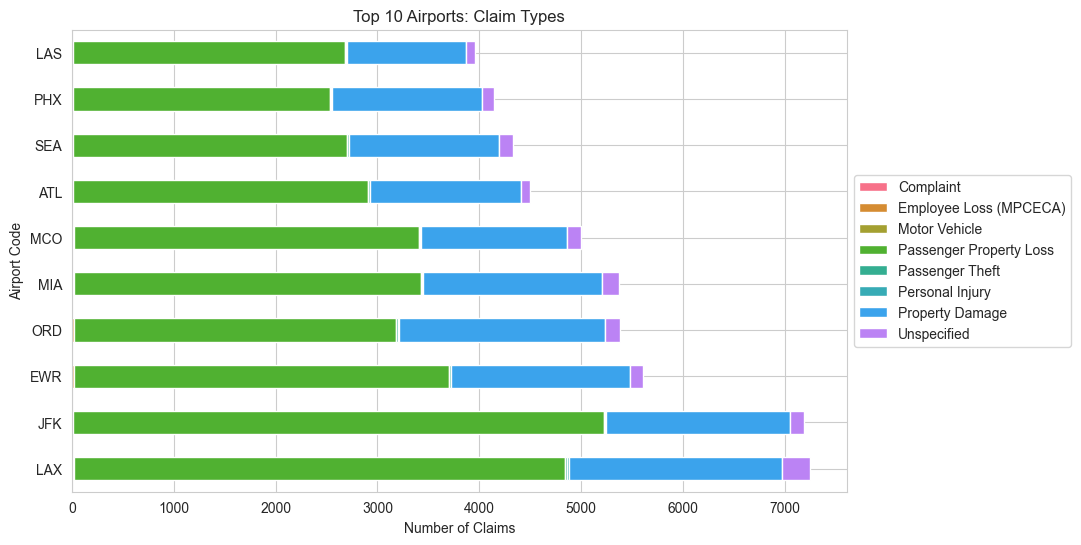

In [83]:
df_checked_baggage = df[df['Claim Site'] == 'Checked Baggage']

# Group the data by airport code and count the number of claims
claims_by_airport = df_checked_baggage.groupby('Airport Code')['Claim Number'].count().reset_index()

# Sort the data by claim frequency in descending order
claims_by_airport = claims_by_airport.sort_values(by='Claim Number', ascending=False)

# Get the top 10 airports with the most claims
top10_airports = claims_by_airport.head(10)['Airport Code'].tolist()

# Filter the data to only include the top 10 airports
df_top10_airports = df_checked_baggage[df_checked_baggage['Airport Code'].isin(top10_airports)]

# Group the data by airport and claim type and count the number of claims
claims_by_airport_and_type = df_top10_airports.groupby(['Airport Code', 'Claim Type'])['Claim Number'].count().reset_index()

# Pivot the data to have airport codes as rows and claim types as columns
claims_by_airport_and_type_pivot = claims_by_airport_and_type.pivot(index='Airport Code', columns='Claim Type', values='Claim Number')

# Sort the data by total number of claims in descending order
claims_by_airport_and_type_pivot['total'] = claims_by_airport_and_type_pivot.sum(axis=1)
claims_by_airport_and_type_pivot = claims_by_airport_and_type_pivot.sort_values(by='total', ascending=False)
claims_by_airport_and_type_pivot.drop('total', axis=1, inplace=True)

# Plot a stacked horizontal bar chart of claim types by airport
sns.set_style('whitegrid')
claims_by_airport_and_type_pivot.plot(kind='barh', stacked=True, figsize=(10, 6), color=sns.color_palette('husl', 9))
plt.title('Top 10 Airports: Claim Types')
plt.xlabel('Number of Claims')
plt.ylabel('Airport Code')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [84]:

airports = df['Airport Code'].unique()
dispositions = df['Disposition'].unique()
airport_disposition = pd.DataFrame(columns=["Airport", "Disposition", "Count"])

for airport in airports:
    airport_df = df[df["Airport Code"] == airport]
    for disposition in dispositions:
        count = airport_df[airport_df["Disposition"] == disposition].shape[0]
        airport_disposition = pd.concat([airport_disposition, pd.DataFrame({"Airport": airport, "Disposition": disposition, "Count": count}, index=[0])], ignore_index=True)

# Pivot the table
airport_disposition = pd.pivot_table(airport_disposition, values='Count', index='Airport', columns='Disposition', fill_value=0)

airport_disposition


Disposition,Approved in Full,Deny,In pursuit,Non-Pursuable,Non-TSA,Settle
Airport,,,,,,
ABE,47,42,0,8,0,31
ABI,11,25,0,6,0,4
ABQ,280,404,1,85,0,164
ABR,6,16,0,4,0,5
ABY,8,25,0,2,0,2
...,...,...,...,...,...,...
YKM,9,23,0,7,0,5
YNG,6,10,0,5,0,3
YUM,10,12,0,6,0,4


In [85]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['Airport Code'], df['Disposition'])

# Perform the chi-squared test to see if there is a relaitionship
chi2, p, dof, expected = chi2_contingency(contingency_table)

alpha = 0.05

contingency_df = pd.DataFrame(contingency_table)

display(contingency_df)
print('\nChi-Squared Test Results:')
results = pd.DataFrame({'Chi-Squared': [chi2],
                        'Degrees of Freedom': [dof],
                        'P-value': [p]})
display(results)

# Determine if the null hypothesis should be rejected
if p < alpha:
    print('\nReject the null hypothesis.')
else:
    print('\nFail to reject the null hypothesis.')

Disposition,Approved in Full,Deny,In pursuit,Non-Pursuable,Non-TSA,Settle
Airport Code,,,,,,
ABE,47,42,0,8,0,31
ABI,11,25,0,6,0,4
ABQ,280,404,1,85,0,164
ABR,6,16,0,4,0,5
ABY,8,25,0,2,0,2
...,...,...,...,...,...,...
YKM,9,23,0,7,0,5
YNG,6,10,0,5,0,3
YUM,10,12,0,6,0,4



Chi-Squared Test Results:


,Chi-Squared,Degrees of Freedom,P-value
0,129694.34968,2310,0.0



Reject the null hypothesis.


#### Getting the top 10 best and worst airports
Before we continue this step we would have to be mathodolical in our approach as our result can easily be biased. For example an Airport that appears once would mean that there is only one claim that appeared and if it was approved in full the data would suggest that claims are approved 100% of the time.

To avoid this we will first determine the average number of times an airport appears in our dataset. From there we will determine the count of airports appears and see if we can work around that. By ranking airports based approval vs deny differences.

In [86]:
# For information purposes only 
airport_counts = df['Airport Code'].value_counts()
avg_count = round(airport_counts.mean())
airport_counts_filtered = airport_counts[airport_counts >= avg_count].value_counts()
around_avg = airport_counts[airport_counts.between(avg_count-120, avg_count+120)]

print("Maximum Count of airport names appear: " + str(airport_counts.max()))
print("Average Count of airport names appear: " + str(avg_count))
print("Number of airports that count around the average.(Range 120 counts above and below Average): " + str(len(around_avg)))

Maximum Count of airport names appear: 9525
Average Count of airport names appear: 419
Number of airports that count around the average.(Range 120 counts above and below Average): 20


In [87]:
# Only want airports that appear around average range
df_filtered = df[df['Airport Code'].isin(around_avg.index)]

grouped = df_filtered.groupby(['Airport Code', 'Disposition']).size().unstack(fill_value=0)

grouped['Total Disposition Count'] = grouped.sum(axis=1)


grouped['Total Approved in Full Count'] = grouped['Approved in Full']
grouped['Total Deny Count'] = grouped['Deny']


grouped = grouped.reset_index()

# Getting the Top 20
df_20 = grouped[['Airport Code', 'Total Disposition Count', 'Total Approved in Full Count', 'Total Deny Count']]
df_20["Proportion Approval %"] = np.round(((df_20["Total Approved in Full Count"] / df_20["Total Disposition Count"]) * 100),2) 


df_20_ranked = df_20.sort_values(by=["Proportion Approval %"], ascending=False)

df_20_ranked = df_20_ranked.reset_index(drop=True)

df_20_ranked

C:\Users\User\AppData\Local\Temp\ipykernel_5580\3585941597.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_20["Proportion Approval %"] = np.round(((df_20["Total Approved in Full Count"] / df_20["Total Disposition Count"]) * 100),2)


Disposition,Airport Code,Total Disposition Count,Total Approved in Full Count,Total Deny Count,Proportion Approval %
0,BOI,368,115,147,31.25
1,PSP,409,120,180,29.34
2,SDF,508,146,229,28.74
3,LIH,439,119,223,27.11
4,DAY,305,82,148,26.89
5,MSN,323,86,160,26.63
6,GSP,480,127,224,26.46
7,PWM,309,81,141,26.21
8,TUL,443,116,213,26.19
9,ISP,344,90,165,26.16


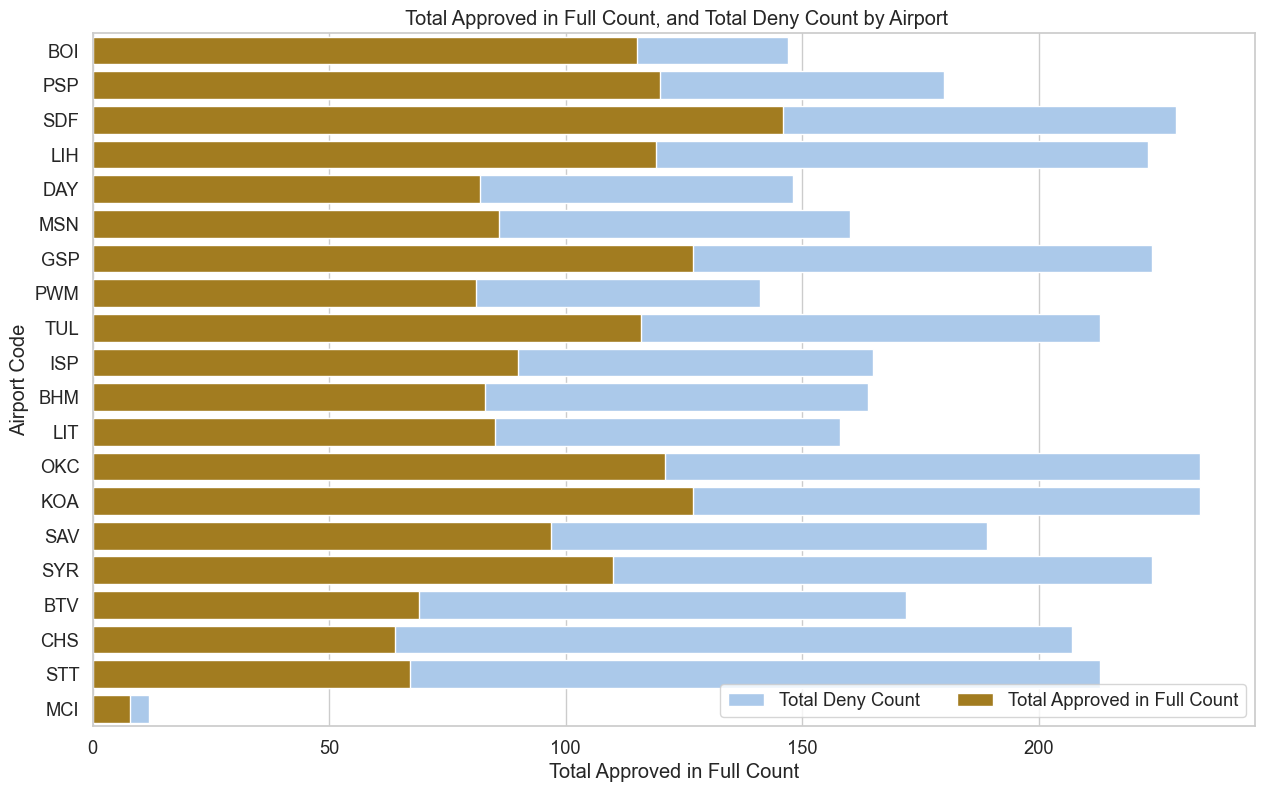

In [88]:
# Set the style and font scale
sns.set(style="whitegrid", font_scale=1.2)

# Create the stacked bar chart
sns.set_color_codes("pastel")
plt.figure(figsize=(15, 9))

sns.barplot(x="Total Deny Count", y="Airport Code", data=df_20_ranked, label="Total Deny Count", color="b")

sns.set_color_codes("dark")
sns.barplot(x="Total Approved in Full Count", y="Airport Code", data=df_20_ranked, label="Total Approved in Full Count", color="y")
# Add legend and title
plt.legend(ncol=3, loc="lower right", frameon=True)
plt.title(" Total Approved in Full Count, and Total Deny Count by Airport")

# Show the plot
plt.show()

In [89]:
from scipy.stats import chi2_contingency
# Create a contingency table
contingency_table = pd.crosstab(df['Airport Code'], df['Disposition'])

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Convert the contingency table into a pandas DataFrame
contingency_df = pd.DataFrame(contingency_table)

# Print the contingency table

contingency_df

Disposition,Approved in Full,Deny,In pursuit,Non-Pursuable,Non-TSA,Settle
Airport Code,,,,,,
ABE,47,42,0,8,0,31
ABI,11,25,0,6,0,4
ABQ,280,404,1,85,0,164
ABR,6,16,0,4,0,5
ABY,8,25,0,2,0,2
...,...,...,...,...,...,...
YKM,9,23,0,7,0,5
YNG,6,10,0,5,0,3
YUM,10,12,0,6,0,4


#### 2.2.5 Top 10 best and worst Airlines 

Just like before we carried out the same steps but the problem that I had found while analysing the data was the requirement to increase the range of occurances slightly below and further up the average.

We first performed a Chi-square

In [90]:
# Create a contingency table
contingency_table = pd.crosstab(df['Airline Name'], df['Disposition'])

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Set the significance level
alpha = 0.05

# Convert the contingency table to a pandas DataFrame
contingency_df = pd.DataFrame(contingency_table)

# Display the results
display(contingency_df)
print('\nChi-Squared Test Results:')
results = pd.DataFrame({'Chi-Squared': [chi2],
                        'Degrees of Freedom': [dof],
                        'P-value': [p]})
display(results)

# Determine if the null hypothesis should be rejected
if p < alpha:
    print('\nReject the null hypothesis.')
else:
    print('\nFail to reject the null hypothesis.')


Disposition,Approved in Full,Deny,In pursuit,Non-Pursuable,Non-TSA,Settle
Airline Name,,,,,,
ATA Aerocondor,53,190,0,13,6,62
Aer Lingus,20,56,0,14,0,18
Aero California,1,1,0,0,0,1
Aero Costa Rica,0,0,0,1,0,0
Aero Flot,9,24,0,17,0,5
...,...,...,...,...,...,...
Westjet Airlines Ltd,83,151,0,50,0,43
Wiggins Airways,0,1,0,0,0,0
XL Airways,0,1,0,1,0,1



Chi-Squared Test Results:


,Chi-Squared,Degrees of Freedom,P-value
0,8768.728936,1160,0.0



Reject the null hypothesis.


In [91]:
airline_counts = df['Airline Name'].value_counts()
avg_count = round(airline_counts.mean())
airline_counts_filtered = airline_counts[airline_counts >= avg_count].value_counts()
# around_avg = airline_counts[airline_counts.between(avg_count-580, avg_count+600)]
around_avg = airline_counts[airline_counts.between(avg_count-500, avg_count+7000)]
# Getting the Maximum
print("Number Unique of Airline names: " + str(df["Airline Name"].nunique()))
print("Maximum Count of Airline names appear: " + str(airline_counts.max()))
print("Average Count of Airline names appear: " + str(avg_count))
print("Number of Airline names that count around the average.(Range 120 counts above and below Average): " + str(len(around_avg)))

Number Unique of Airline names: 233
Maximum Count of Airline names appear: 31309
Average Count of Airline names appear: 832
Number of Airline names that count around the average.(Range 120 counts above and below Average): 20


In [92]:
# Filter df to only include airlines in around_avg
df_filtered_airline = df[df['Airline Name'].isin(around_avg.index)]
#Test Test 
# Group the filtered dataframe by airline and disposition
grouped_airline = df_filtered_airline.groupby(['Airline Name', 'Disposition']).size().unstack(fill_value=0)

# Add a column for the total disposition count
grouped_airline['Total Disposition Count'] = grouped_airline.sum(axis=1)

# Add columns for each disposition value count
grouped_airline['Total Approved in Full Count'] = grouped_airline['Approved in Full']
grouped_airline['Total Deny Count'] = grouped_airline['Deny']

# Reset the index to make 'Airline Name' a column
grouped_airline = grouped_airline.reset_index()

# Select the columns you want to keep in df_20_airline
df_20_airline = grouped_airline[['Airline Name', 'Total Disposition Count', 'Total Approved in Full Count', 'Total Deny Count']]
df_20_airline["Proportion Approval %"] = np.round(((df_20_airline["Total Approved in Full Count"] / df_20_airline["Total Disposition Count"]) * 100),2) 

# Sort the values by the proportion of approvals
df_20_airline_ranked = df_20_airline.sort_values(by=["Proportion Approval %"], ascending=False)

# Reset the index
df_20_airline_ranked = df_20_airline_ranked.reset_index(drop=True)

df_20_airline_ranked


C:\Users\User\AppData\Local\Temp\ipykernel_5580\3824142317.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_20_airline["Proportion Approval %"] = np.round(((df_20_airline["Total Approved in Full Count"] / df_20_airline["Total Disposition Count"]) * 100),2)


Disposition,Airline Name,Total Disposition Count,Total Approved in Full Count,Total Deny Count,Proportion Approval %
0,Horizon Air,368,122,153,33.15
1,America West,1384,442,494,31.94
2,Delta (Song),378,110,177,29.10
3,American West,389,103,199,26.48
4,Alaska Airlines,6417,1603,2976,24.98
5,Hawaiian Airlines,1421,349,703,24.56
6,Air Canada,906,205,453,22.63
7,American Eagle,412,87,229,21.12
8,AirTran Airlines,3312,693,1844,20.92
9,Allegiant Air,1074,224,585,20.86


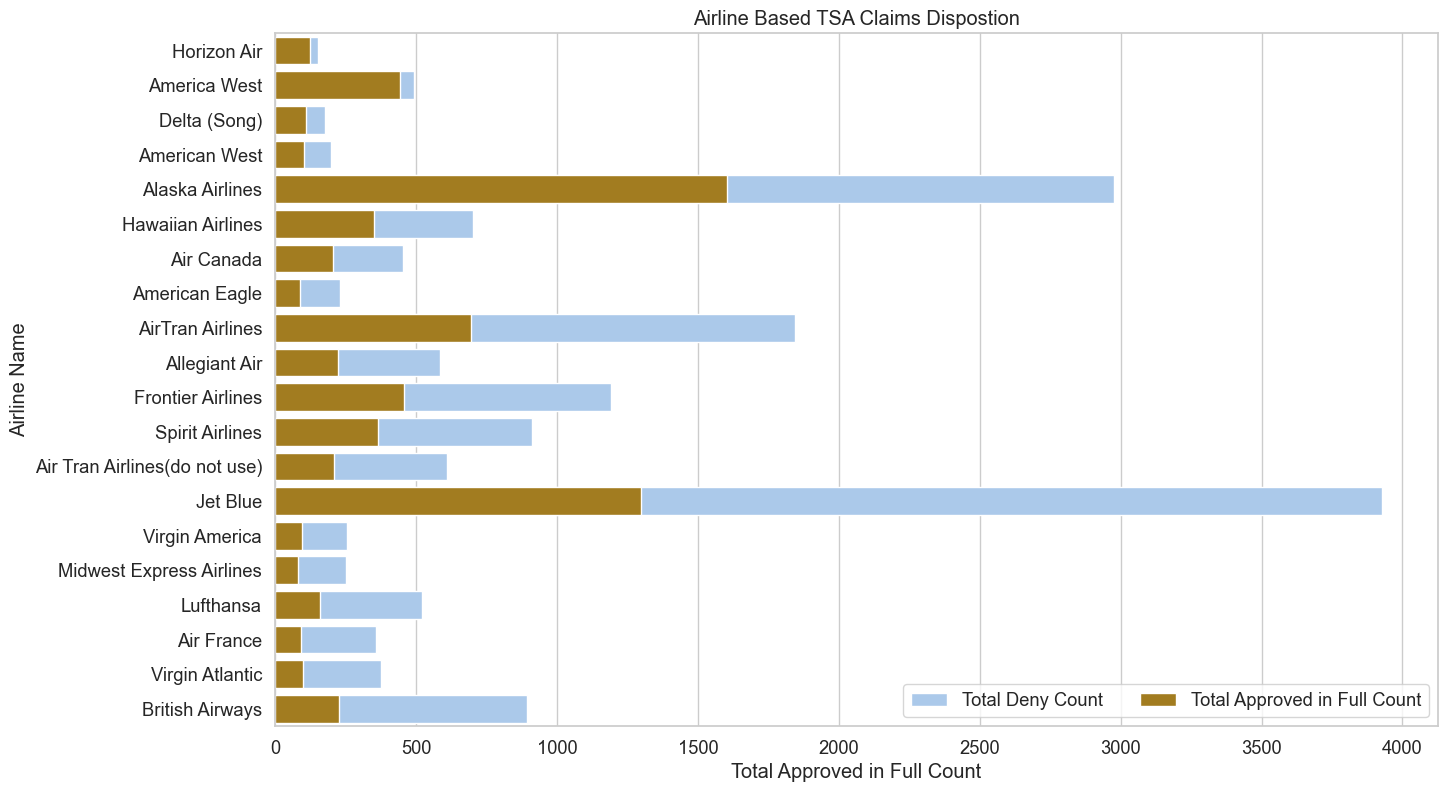

In [93]:
# Set the style and font scale
sns.set(style="whitegrid", font_scale=1.2)

# Create the stacked bar chart
sns.set_color_codes("pastel")
plt.figure(figsize=(15, 9))


sns.barplot(x="Total Deny Count", y="Airline Name", data=df_20_airline_ranked, label="Total Deny Count", color="b")

sns.set_color_codes("dark")
sns.barplot(x="Total Approved in Full Count", y="Airline Name", data=df_20_airline_ranked, label="Total Approved in Full Count", color="y")

# Add legend and title
plt.legend(ncol=3, loc="lower right", frameon=True)
plt.title("Airline Based TSA Claims Dispostion")

# Show the plot
plt.show()


In [94]:
df_20_airline_ranked["Airline Name"].unique()

array(['Horizon Air', 'America West', 'Delta (Song)', 'American West',
       'Alaska Airlines', 'Hawaiian Airlines', 'Air Canada',
       'American Eagle', 'AirTran Airlines', 'Allegiant Air',
       'Frontier Airlines', 'Spirit Airlines',
       'Air Tran Airlines(do not use)', 'Jet Blue', 'Virgin America',
       'Midwest Express Airlines', 'Lufthansa', 'Air France',
       'Virgin Atlantic', 'British Airways'], dtype=object)

In [95]:
import pandas as pd

airlines = ['Horizon Air', 'America West', 'Delta (Song)', 'American West',
            'Alaska Airlines', 'Hawaiian Airlines', 'Air Canada',
            'American Eagle', 'AirTran Airlines', 'Allegiant Air',
            'Frontier Airlines', 'Spirit Airlines',
            'Air Tran Airlines(do not use)', 'Jet Blue', 'Virgin America',
            'Midwest Express Airlines', 'Lufthansa', 'Air France',
            'Virgin Atlantic', 'British Airways']

# Dictionary mapping airline names to their respective countries of origin
airline_countries = {'Horizon Air': 'United States',
                     'America West': 'United States',
                     'Delta (Song)': 'United States',
                     'American West': 'United States',
                     'Alaska Airlines': 'United States',
                     'Hawaiian Airlines': 'United States',
                     'Air Canada': 'Canada',
                     'American Eagle': 'United States',
                     'AirTran Airlines': 'United States',
                     'Allegiant Air': 'United States',
                     'Frontier Airlines': 'United States',
                     'Spirit Airlines': 'United States',
                     'Air Tran Airlines(do not use)': 'United States',
                     'Jet Blue': 'United States',
                     'Virgin America': 'United States',
                     'Midwest Express Airlines': 'United States',
                     'Lufthansa': 'Germany',
                     'Air France': 'France',
                     'Virgin Atlantic': 'United Kingdom',
                     'British Airways': 'United Kingdom'}

# Create a DataFrame from the dictionary
df_airline_origin = pd.DataFrame.from_dict(airline_countries, orient='index', columns=['Country'])

# Add the 'Airline Name' column
df_airline_origin = df_airline_origin.reset_index().rename(columns={'index': 'Airline Name'})

# Filter the DataFrame to include only the airlines in the list
df_airline_origin = df_airline_origin[df_airline_origin['Airline Name'].isin(airlines)]

# Reset the index
df_airline_origin = df_airline_origin.reset_index(drop=True)

df_airline_origin

,Airline Name,Country
0,Horizon Air,United States
1,America West,United States
2,Delta (Song),United States
3,American West,United States
4,Alaska Airlines,United States
5,Hawaiian Airlines,United States
6,Air Canada,Canada
7,American Eagle,United States
8,AirTran Airlines,United States
9,Allegiant Air,United States


### How Airlines would impact TSA claims 
This data was manually filled in to determine TSA Claims on approval vs Airlines themselves and to retrieve their country of origin via Wikipedia. It was produced because some of these airlines seemed to have a lower porprotion of approvals verses the total count of dispostion. As in the likes of airlines from the United Kingdom where the rate is below 20%. But Canada would be the exception in this dataset as they would have similar TSA procedure as that of the US. 

But their could be alot of other factors that would contribute to this. As International Passengers are not aware of the role of the TSA and thus continue on with their vacation. But overall it could be due to the type of passenger that impacts TSA claims overall. 

There is no other way I can determine this with the limited data I have.

TSA Airports 